In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [146]:
def transform_bitcoin_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    This function adds the following columns to our bitcoin dataframe:
    %PriceChange: To look at price change within a day
    priceDiff: To look at the per day absolute price change
    normalizedVol: To compare relative trading activity
    7DayMovingAvgPrice: To be able to observe long-term effects
    30DayMovingAvgPrice: To be able to observe long-term effects
    7DayMovingAvgVol: To be able to observe long-term effects
    30DayMovingAvgVol: To be able to observe long-term effects
    Volatility: To look agt how volatile Bitcoin is per day
    
    Note: The first 7 or 30 values for Moving averages for a week or month, respectively,
        are NaN values because there aren't sufficient rows to calculate the average. 
        We have decided to leave these values as NaN to preserve data integrity and not fill
        them which could possibly distort our analysis.
    
    TODO: Add Event flag: Pre [1], During[2], Post[3]
    TODO: Add doctests to see if the calculations are correct
    
    :param data: bitcoin dataframe
    :return: data: bitcoin dataframe with the columns above
    """
    # Adding column for % Price Change per day 
    data['%PriceChange'] = round(((data['Close'] - data['Open']) / data['Open']) * 100, 3)
    
    # Normalizing %PriceChange
    data['normalizedPriceChange'] = data['%PriceChange'] / data['%PriceChange'].abs().max()
    
    # Adding column for price difference
    data['priceDiff'] = round(data['Close'] - data['Open'], 3)
    
    # Adding column to look at the normalized trading volume
    data['normalizedVol'] = data['Volume'] / data['Volume'].max()
    
    # Adding columns for moving averages to compare long-term results
    # Learnt about the rolling function through ChatGPT
    data['7DayMovingAvgPrice'] = round(data['Close'].rolling(window=7).mean(), 3)
    data['30DayMovingAvgPrice'] = round(data['Close'].rolling(window=30).mean(), 3)
    data['7DayMovingAvgVol'] = data['normalizedVol'].rolling(window=7).mean()
    data['30DayMovingAvgVol'] = data['normalizedVol'].rolling(window=30).mean()
    
    data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100
    
    return data

In [147]:
def get_bitcoin_data(filename: str) -> pd.DataFrame:
    """
    Reads the bitcoin csv data into a pandas dataframe.
    
    :param filename: bitcoin csv file name
    :return: df: bitcoin data as a pandas dataframe
    """
    
    df = pd.read_csv(filename)
    
    # converting 'Date' column to pd.datetime format to perform calculations
    df['Date'] = pd.to_datetime(df['Date'])
    
    df = transform_bitcoin_data(df)
    
    return df

In [148]:
bitcoin_df = get_bitcoin_data('bitcoin_historical_data.csv')

In [149]:
bitcoin_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', '%PriceChange', 'normalizedPriceChange', 'priceDiff',
       'normalizedVol', '7DayMovingAvgPrice', '30DayMovingAvgPrice',
       '7DayMovingAvgVol', '30DayMovingAvgVol', 'Volatility'],
      dtype='object')

Studying Price trends within our Bitcoin data

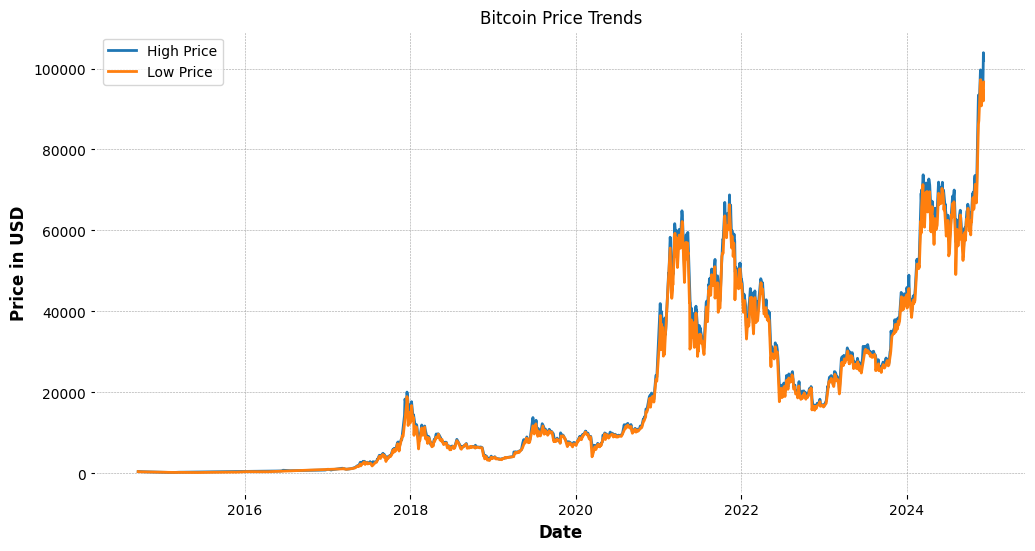

In [150]:
# Observing price trends (Open, High, Low, Close)
plt.figure(figsize=(12, 6))
# plt.plot(bitcoin_df['Date'], bitcoin_df['Open'], label='Open Price')
plt.plot(bitcoin_df['Date'], bitcoin_df['High'], label='High Price')
plt.plot(bitcoin_df['Date'], bitcoin_df['Low'], label='Low Price')
# plt.plot(bitcoin_df['Date'], bitcoin_df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price Trends')
plt.legend()
plt.grid(True)
plt.show()

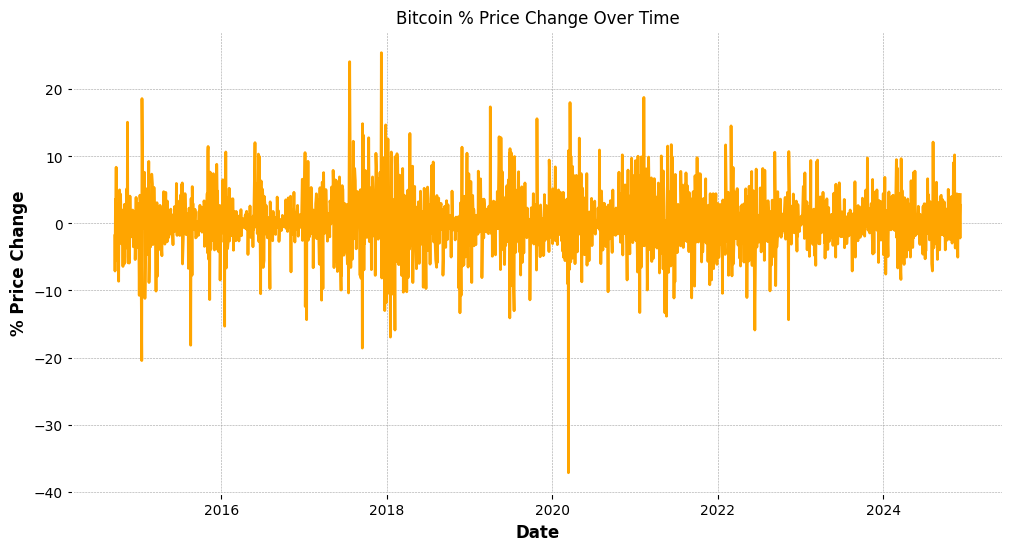

In [151]:
#  % price change over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['%PriceChange'], label='% Price Change', color='orange')
plt.xlabel('Date')
plt.ylabel('% Price Change')
plt.title('Bitcoin % Price Change Over Time')
plt.grid(True)
plt.show()

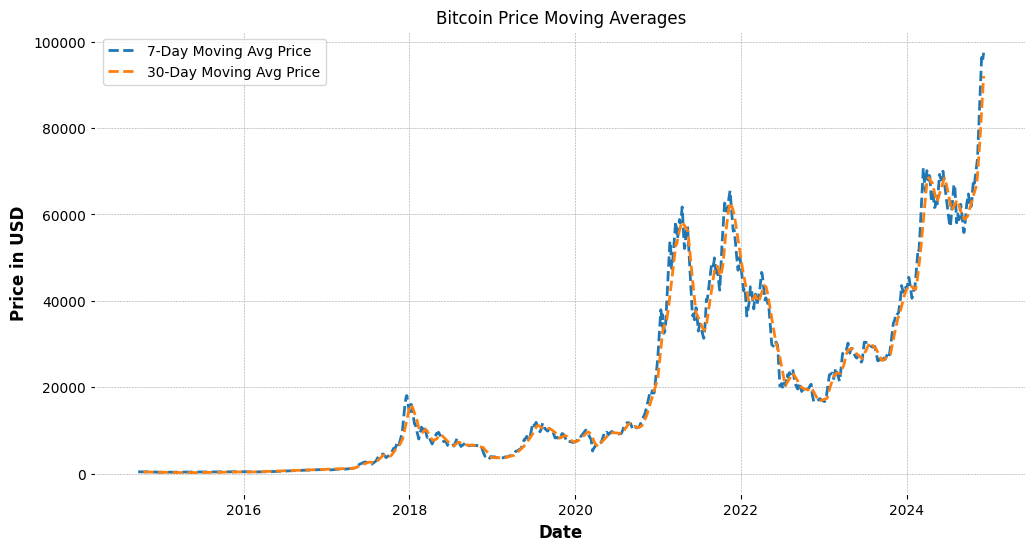

In [152]:
# price averages over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['7DayMovingAvgPrice'], label='7-Day Moving Avg Price', linestyle='--')
plt.plot(bitcoin_df['Date'], bitcoin_df['30DayMovingAvgPrice'], label='30-Day Moving Avg Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

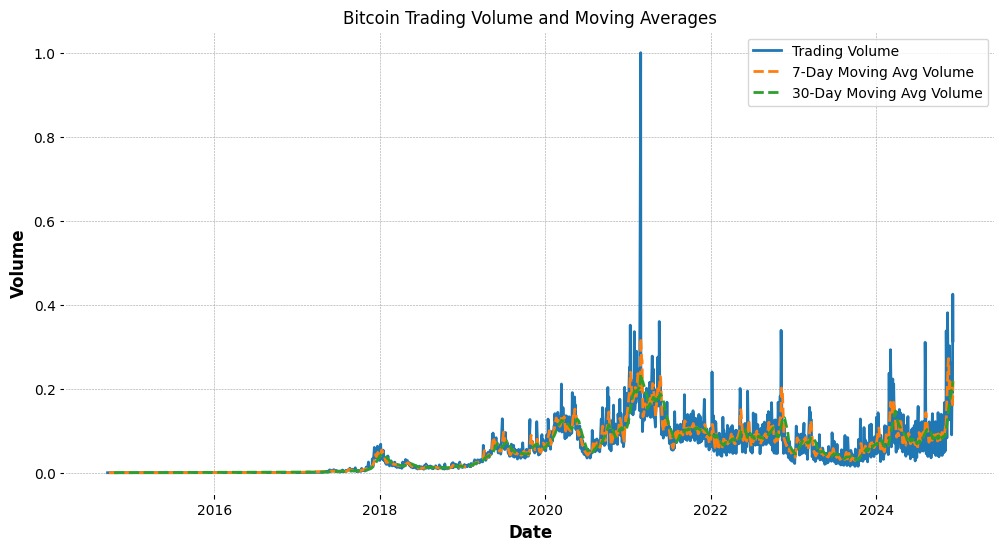

In [153]:
# trading volume averages
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['normalizedVol'], label='Trading Volume')
plt.plot(bitcoin_df['Date'], bitcoin_df['7DayMovingAvgVol'], label='7-Day Moving Avg Volume', linestyle='--')
plt.plot(bitcoin_df['Date'], bitcoin_df['30DayMovingAvgVol'], label='30-Day Moving Avg Volume', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Bitcoin Trading Volume and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

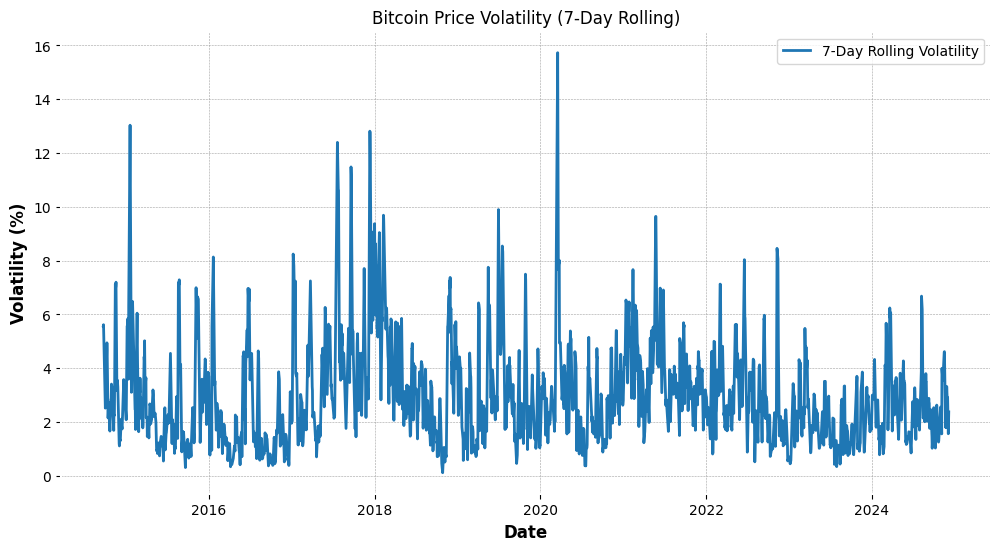

In [154]:
# Calculate rolling standard deviation for price change (volatility)
bitcoin_df['Volatility'] = bitcoin_df['%PriceChange'].rolling(window=7).std()

# Plotting the volatility
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['Volatility'], label='7-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.title('Bitcoin Price Volatility (7-Day Rolling)')
plt.grid(True)
plt.legend()
plt.show()


In [155]:
bitcoin_df['Date'].min()

Timestamp('2014-09-17 00:00:00+0000', tz='UTC')

Reading Policy Data

In [156]:
import pytz

In [157]:
def get_US_law_data(filename: str) -> pd.DataFrame:
    """
    This function reads the US Law data csv file into a pandas dataframe.
    
    :param filename: name of file with US Law data
    :return: dataframe containing US Law data
    """
    
    df = pd.read_excel(filename)
    
    df['Date of Introduction'] = pd.to_datetime(df['Date of Introduction'])
    df['Latest Action Date'] = pd.to_datetime(df['Latest Action Date'])
    
    # Making law data timezone aware to EST, since bitcoin data is timezone-aware
    df['Date of Introduction'] = df['Date of Introduction'].dt.tz_localize('UTC')
    est_tz = pytz.timezone('US/Eastern')
    df['Date of Introduction'] = df['Date of Introduction'].dt.tz_convert(est_tz)
    
    return df

In [158]:
law_df = get_US_law_data('US_newdata.xlsx')

In [159]:
law_df.dtypes

Legislation Number          object
Title                       object
Type                        object
Party of Sponsor            object
Committees                  object
                            ...   
Amends Bill                float64
Date Offered               float64
Date Submitted             float64
Date Proposed              float64
Amendment Text (Latest)    float64
Length: 202, dtype: object

In [160]:
law_df.head()

Legislation Number                                              Title  \
0            S. 2669    Digital Asset Anti-Money Laundering Act of 2023   
1          H.R. 4763  Financial Innovation and Technology for the 21...   
2           H.R. 389                                      PORTFOLIO Act   
3          H.R. 6572         Deploying American Blockchains Act of 2023   
4            S. 2355  Crypto-Asset National Security Enhancement and...   

                                    Type Party of Sponsor Committees  \
0    directly related to cyptocurrencies       Democratic     Senate   
1    directly related to cyptocurrencies       Republican      House   
2  directly related to anti moneywashing       Republican      House   
3         directly related to Blockchain       Republican      House   
4    directly related to cyptocurrencies       Democratic     Senate   

       Progress      Date of Introduction Latest Action Date  \
0    introduced 2023-07-26 20:00:00-04:00         2024-02-01   
1  Passed House 2023-07-19 20:00:00-04:00         2024-09-09   
2    introduced 2023-01-16 19:00:00-05:00         2023-01-17   
3  Passed House 2023-12-03 19:00:00-05:00         2024-05-16   
4    introduced 2023-07-17 20:00:00-04:00         2023-10-26   

   Number of Cosponsors                             Subject  ...  \
0                    18        Finance and Financial Sector  ...   
1                    11        Finance and Financial Sector  ...   
2                     0  Government Operations and Politics  ...   
3                     3                            Commerce  ...   
4                     3        Finance and Financial Sector  ...   

  Related Bill Latest Action.82 Related Bill Latest Action.83  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  Related Bill Latest Action.84 Related Bill Latest Action.85  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

                                      Latest Summary Amends Bill Date Offered  \
0  <p><strong>Digital Asset Anti-Money Laundering...         NaN          NaN   
1  <p><strong>Financial Innovation and Technology...         NaN          NaN   
2   <p><b>Preventing Opportunistic Returns on Tra...         NaN          NaN   
3  <p><strong>Deploying American Blockchains Act ...         NaN          NaN   
4  <p><strong>Crypto-Asset National Security Enha...         NaN          NaN   

  Date Submitted Date Proposed Amendment Text (Latest)  
0            NaN           NaN                     NaN  
1            NaN           NaN                     NaN  
2            NaN           NaN                     NaN  
3            NaN           NaN                     NaN  
4            NaN           NaN                     NaN  

[5 rows x 202 columns]

Adding Event Period Flags to Crypto Data
* PreEvent [1], DuringEvent[2], PostEvent[3]

In [161]:
def event_period_flag(row, event_dates, pre_window=14, post_window=14):
    for event_date in event_dates:
        # Define the window: 7 days from the event date
        event_start_window = event_date
        event_end_window = event_date + pd.Timedelta(days=7)  # 7-day window from the event date

        # Check if the row falls within the event period
        if event_start_window <= row <= event_end_window:
            return 1  # DuringEvent
    
    # If no match, return None (or you can leave it unflagged)
    return 0

In [162]:
event_dates = law_df['Date of Introduction'].tolist()
bitcoin_df['EventPeriod'] = bitcoin_df['Date'].apply(lambda x: event_period_flag(x, event_dates))


In [163]:
bitcoin_df.head(50)

Date        Open        High         Low       Close  \
0  2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
1  2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2  2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
3  2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
4  2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   
5  2014-09-22 00:00:00+00:00  399.100006  406.915985  397.130005  402.152008   
6  2014-09-23 00:00:00+00:00  402.092010  441.557007  396.196991  435.790985   
7  2014-09-24 00:00:00+00:00  435.751007  436.112000  421.131989  423.204987   
8  2014-09-25 00:00:00+00:00  423.156006  423.519989  409.467987  411.574005   
9  2014-09-26 00:00:00+00:00  411.428986  414.937988  400.009003  404.424988   
10 2014-09-27 00:00:00+00:00  403.556000  406.622986  397.372009  399.519989   
11 2014-09-28 00:00:00+00:00  399.471008  401.016998  374.332001  377.181000   
12 2014-09-29 00:00:00+00:00  376.928009  385.210999  372.239990  375.467010   
13 2014-09-30 00:00:00+00:00  376.088013  390.976990  373.442993  386.944000   
14 2014-10-01 00:00:00+00:00  387.427002  391.378998  380.779999  383.614990   
15 2014-10-02 00:00:00+00:00  383.988007  385.497009  372.946014  375.071991   
16 2014-10-03 00:00:00+00:00  375.181000  377.695007  357.859009  359.511993   
17 2014-10-04 00:00:00+00:00  359.891998  364.487000  325.885986  328.865997   
18 2014-10-05 00:00:00+00:00  328.915985  341.800995  289.295990  320.510010   
19 2014-10-06 00:00:00+00:00  320.389008  345.134003  302.559998  330.079010   
20 2014-10-07 00:00:00+00:00  330.584015  339.247009  320.481995  336.187012   
21 2014-10-08 00:00:00+00:00  336.115997  354.364014  327.187988  352.940002   
22 2014-10-09 00:00:00+00:00  352.747986  382.726013  347.687012  365.026001   
23 2014-10-10 00:00:00+00:00  364.687012  375.066986  352.963013  361.562012   
24 2014-10-11 00:00:00+00:00  361.362000  367.191010  355.950989  362.299011   
25 2014-10-12 00:00:00+00:00  362.605988  379.433014  356.144012  378.549011   
26 2014-10-13 00:00:00+00:00  377.920990  397.226013  368.897003  390.414001   
27 2014-10-14 00:00:00+00:00  391.691986  411.697998  391.324005  400.869995   
28 2014-10-15 00:00:00+00:00  400.954987  402.226990  388.765991  394.773010   
29 2014-10-16 00:00:00+00:00  394.518005  398.807007  373.070007  382.556000   
30 2014-10-17 00:00:00+00:00  382.756012  385.477997  375.389008  383.757996   
31 2014-10-18 00:00:00+00:00  383.976013  395.157990  378.971008  391.441986   
32 2014-10-19 00:00:00+00:00  391.253998  393.938995  386.457001  389.545990   
33 2014-10-20 00:00:00+00:00  389.230988  390.084015  378.252014  382.845001   
34 2014-10-21 00:00:00+00:00  382.420990  392.645996  380.834015  386.475006   
35 2014-10-22 00:00:00+00:00  386.118011  388.575989  382.248993  383.157990   
36 2014-10-23 00:00:00+00:00  382.962006  385.048004  356.446991  358.416992   
37 2014-10-24 00:00:00+00:00  358.591003  364.345001  353.304993  358.345001   
38 2014-10-25 00:00:00+00:00  358.610992  359.860992  342.877014  347.270996   
39 2014-10-26 00:00:00+00:00  347.487000  359.221008  343.931000  354.704010   
40 2014-10-27 00:00:00+00:00  354.777008  358.631989  349.808990  352.989014   
41 2014-10-28 00:00:00+00:00  353.214996  359.984009  352.678986  357.618011   
42 2014-10-29 00:00:00+00:00  357.088989  357.833008  335.342987  335.591003   
43 2014-10-30 00:00:00+00:00  335.709015  350.912994  335.071991  345.304993   
44 2014-10-31 00:00:00+00:00  345.009003  348.045013  337.141998  338.321014   
45 2014-11-01 00:00:00+00:00  338.649994  340.528992  321.054993  325.748993   
46 2014-11-02 00:00:00+00:00  326.075012  329.049988  320.626007  325.891998   
47 2014-11-03 00:00:00+00:00  325.569000  334.002014  325.480988  327.553986   
48 2014-11-04 00:00:00+00:00  327.161011  331.766998  325.076996  330.492004   
49 2014-11-05 00:00:00+0

In [164]:
bitcoin_df[bitcoin_df['Date'] == '2014-12-02 00:00:00+00:00']

Date    Open        High         Low       Close  \
76 2014-12-02 00:00:00+00:00  379.25  384.037994  377.863007  381.315002   

      Volume  Dividends  Stock Splits  %PriceChange  normalizedPriceChange  \
76  12364100        0.0           0.0         0.544               0.014629   

    priceDiff  normalizedVol  7DayMovingAvgPrice  30DayMovingAvgPrice  \
76      2.065       0.000035             375.512               369.73   

    7DayMovingAvgVol  30DayMovingAvgVol  Volatility  EventPeriod  
76           0.00004           0.000063    1.195518            1

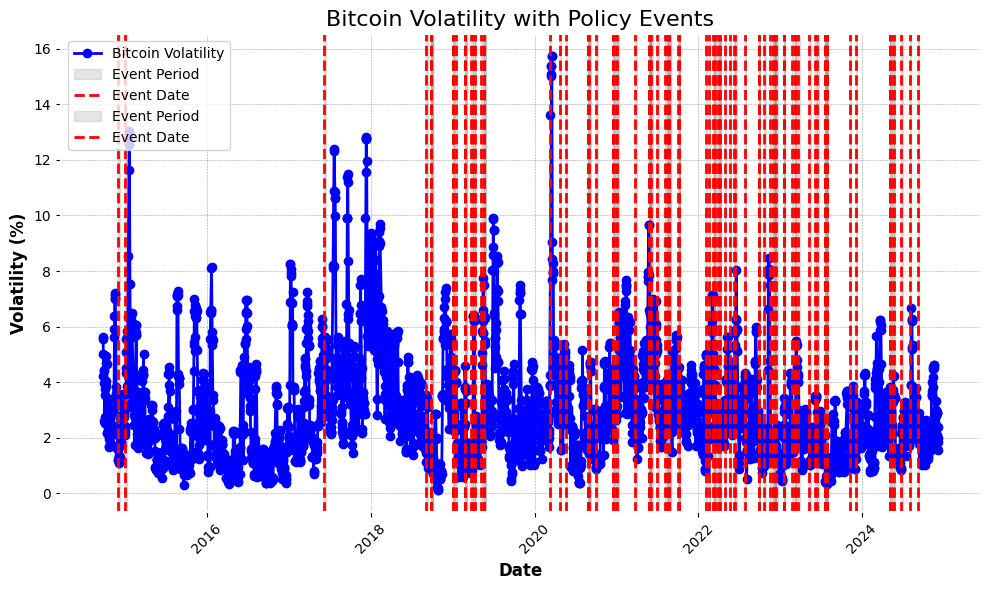

In [165]:
# Plot Bitcoin Volatility Trend
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(bitcoin_df['Date'], bitcoin_df['Volatility'], label='Bitcoin Volatility', color='b', linestyle='-', marker='o')

# Mark "DuringEvent" with shaded regions and event dates with vertical lines
for event_date in event_dates:
    # Mark the 7-day event window
    event_start_window = event_date
    event_end_window = event_date + pd.Timedelta(days=7)

    # Shaded region for event period
    ax.axvspan(event_start_window, event_end_window, color='gray', alpha=0.2, label='Event Period' if event_date == event_dates[0] else "")

    # Vertical line for each Date of Introduction
    ax.axvline(event_date, color='r', linestyle='--', label='Event Date' if event_date == event_dates[0] else "")

# Label the chart
ax.set_title('Bitcoin Volatility with Policy Events', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volatility (%)', fontsize=12)
ax.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

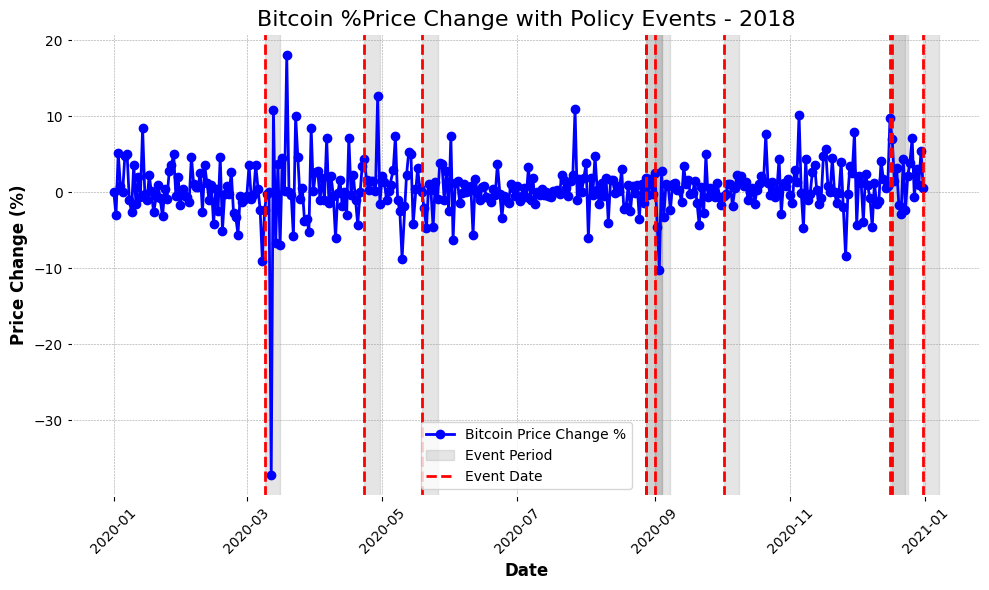

In [166]:
# Filter Bitcoin data for the year 2018
bitcoin_df_2018 = bitcoin_df[bitcoin_df['Date'].dt.year == 2020]

# Filter event dates for 2018
event_dates_2018 = law_df[law_df['Date of Introduction'].dt.year == 2020]['Date of Introduction'].tolist()

# Plot Bitcoin Volatility Trend for 2018
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Bitcoin Volatility Trend for the year 2018
ax.plot(bitcoin_df_2018['Date'], bitcoin_df_2018['%PriceChange'], label='Bitcoin Price Change %', color='b', linestyle='-', marker='o')

# Mark "DuringEvent" with shaded regions and event dates with vertical lines
for event_date in event_dates_2018:
    # Mark the 7-day event window
    event_start_window = event_date
    event_end_window = event_date + pd.Timedelta(days=7)

    # Shaded region for event period
    ax.axvspan(event_start_window, event_end_window, color='gray', alpha=0.2, label='Event Period' if event_date == event_dates_2018[0] else "")

    # Vertical line for each Date of Introduction
    ax.axvline(event_date, color='r', linestyle='--', label='Event Date' if event_date == event_dates_2018[0] else "")

# Label the chart
ax.set_title('Bitcoin %Price Change with Policy Events - 2018', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price Change (%)', fontsize=12)
ax.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

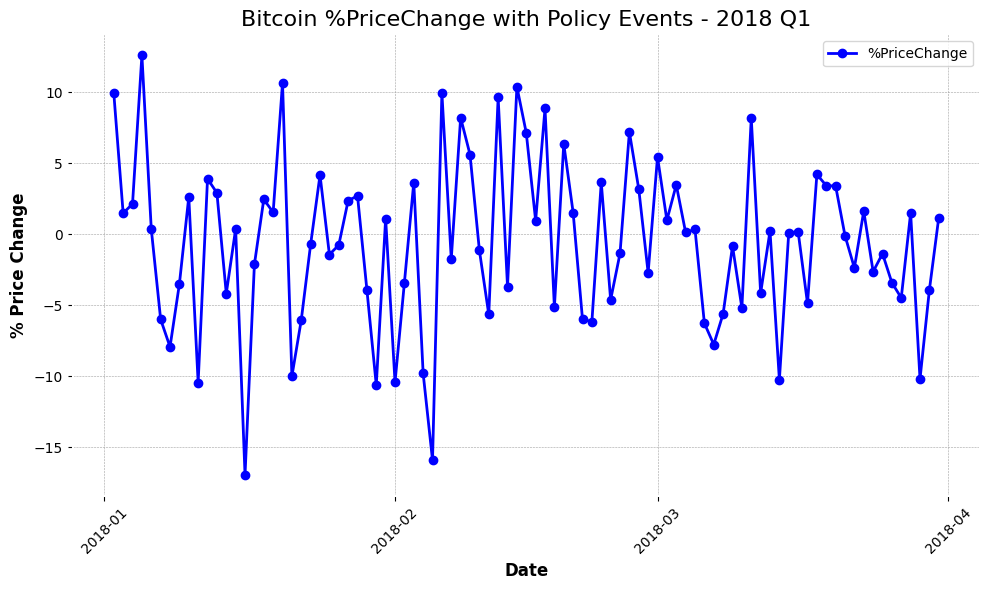

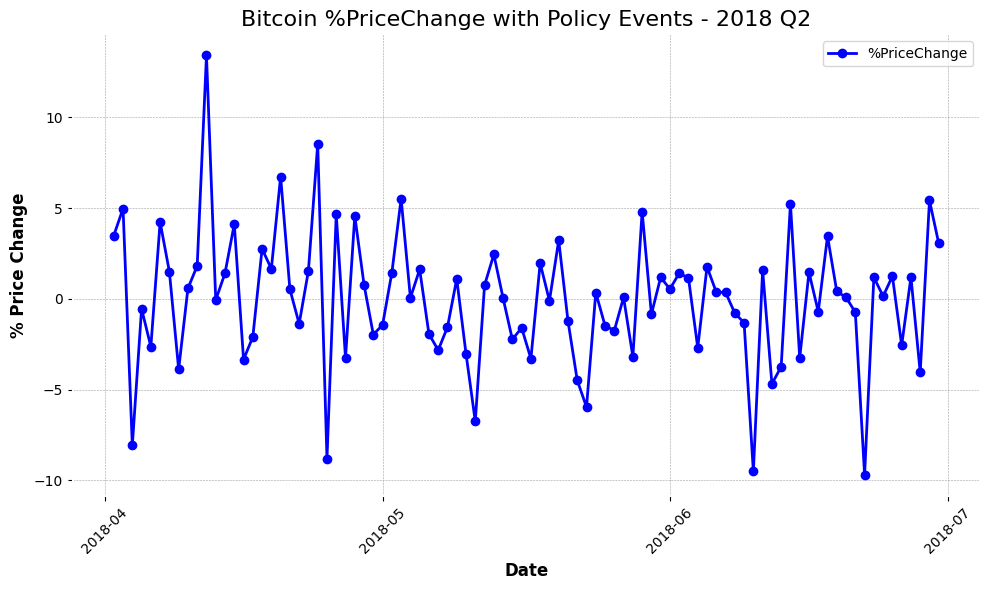

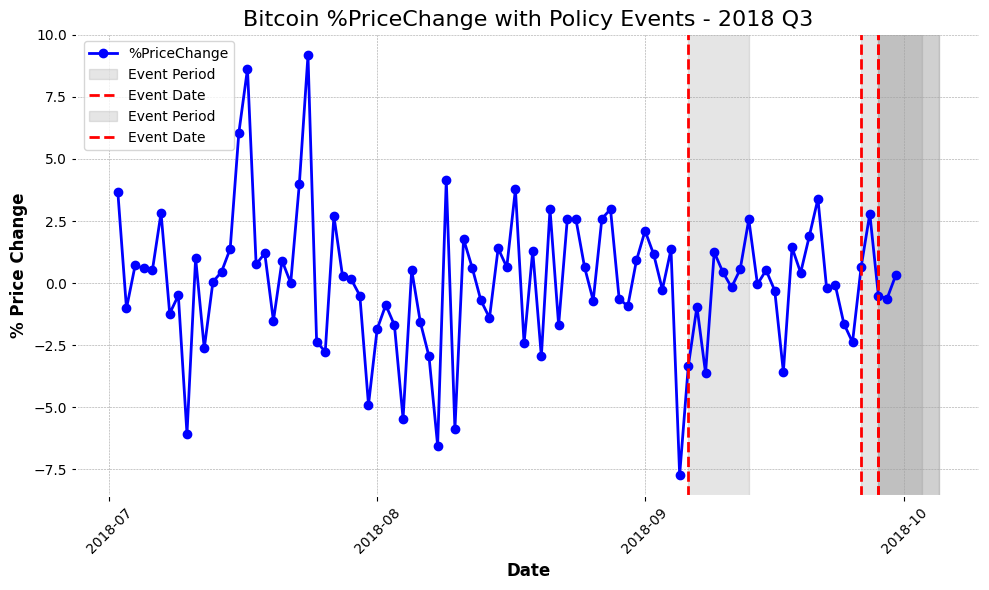

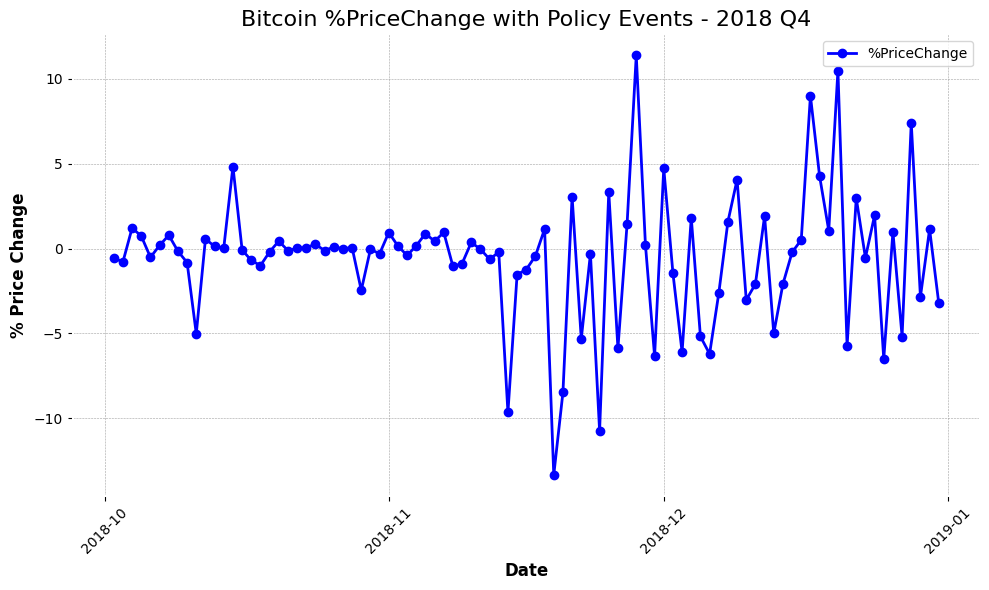

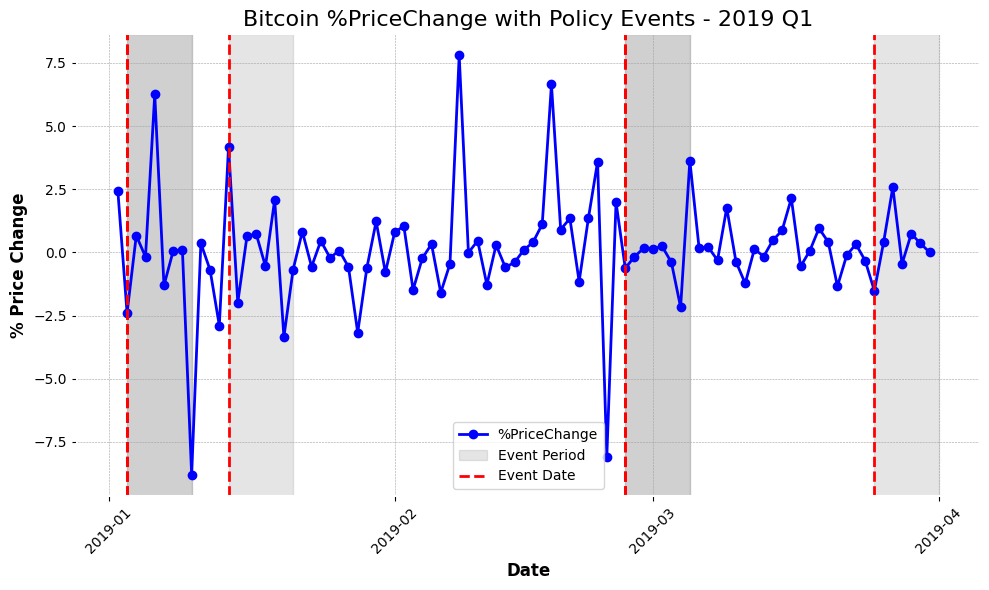

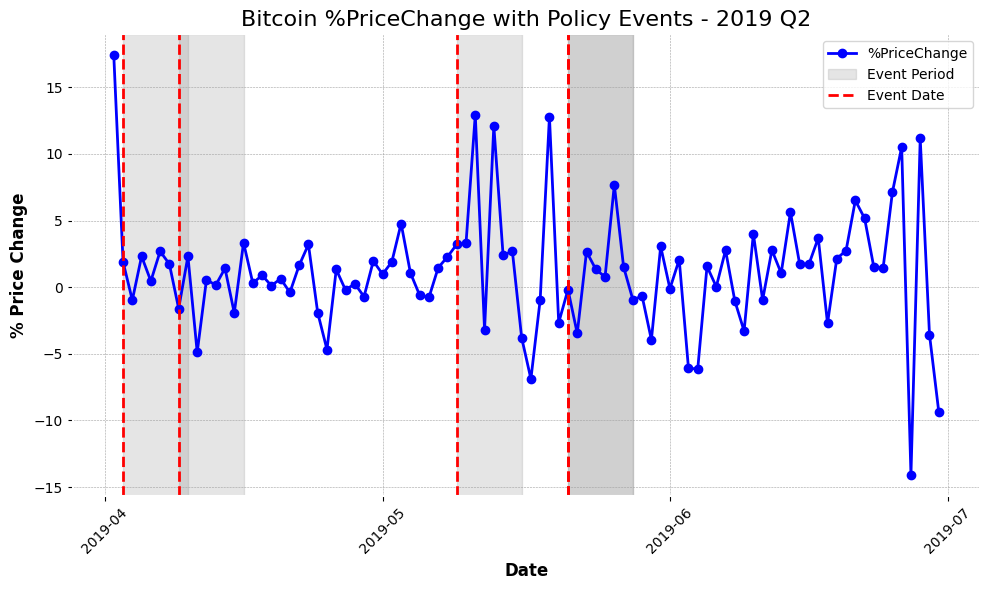

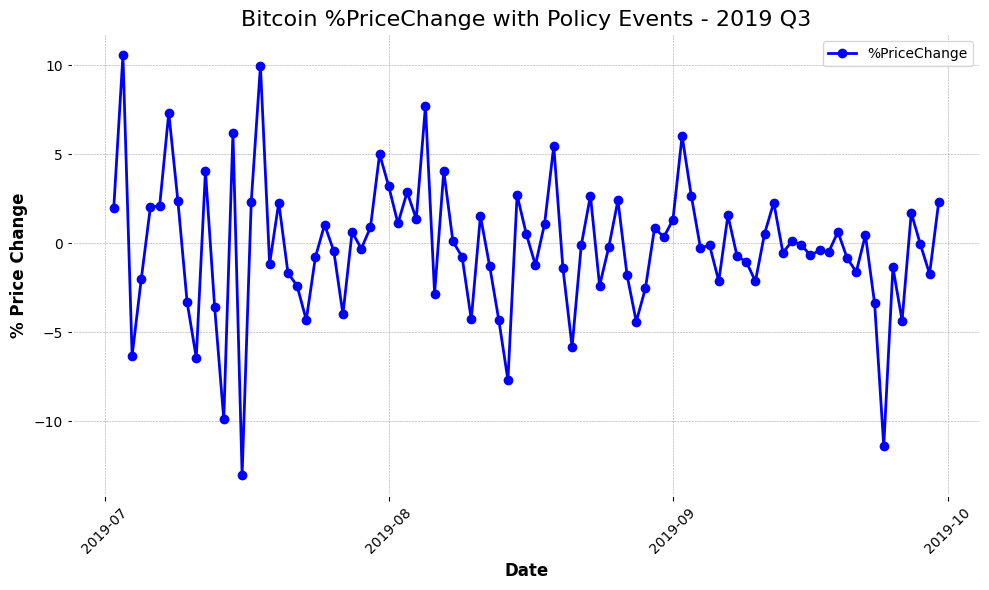

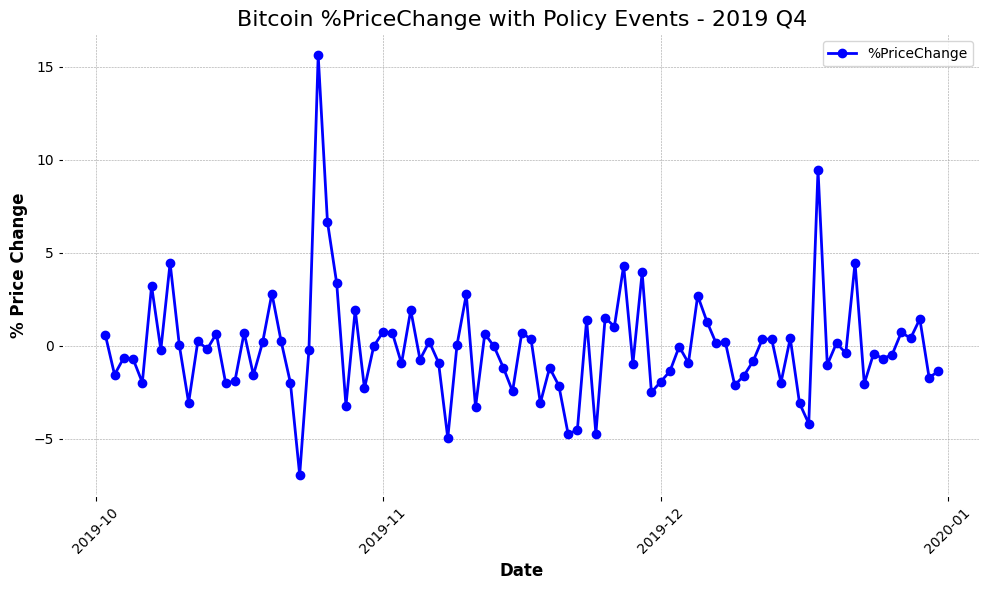

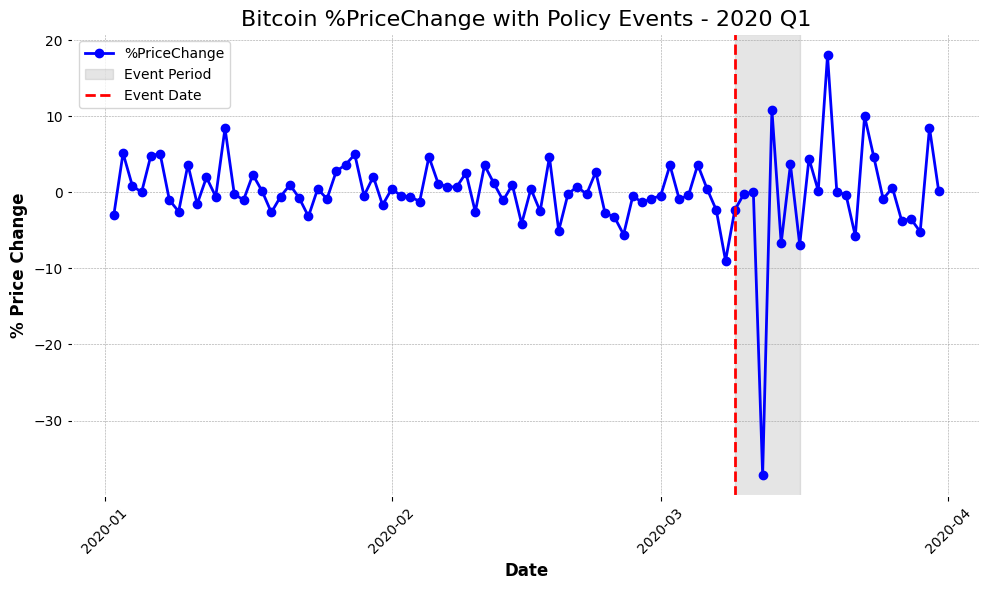

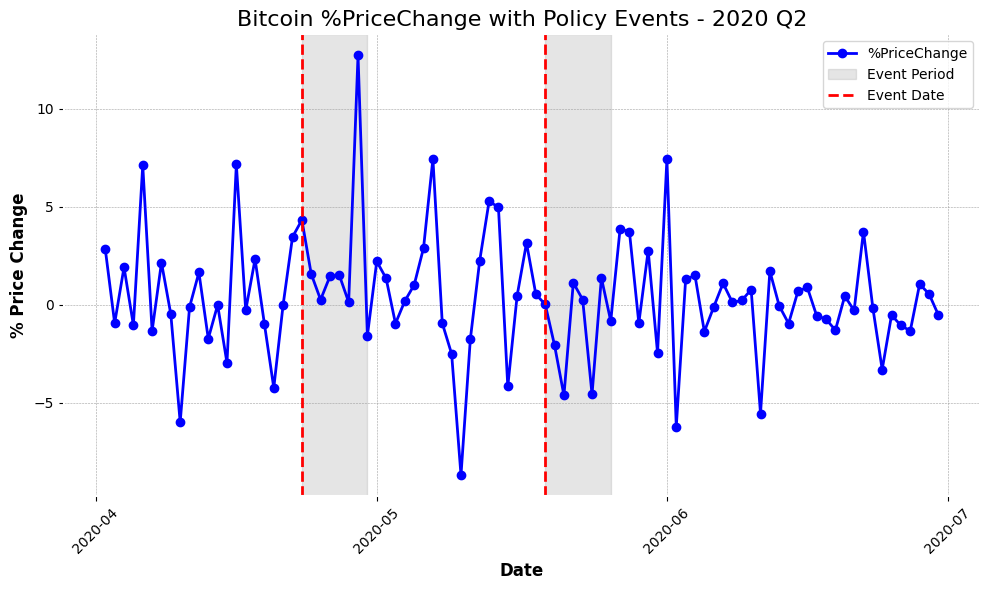

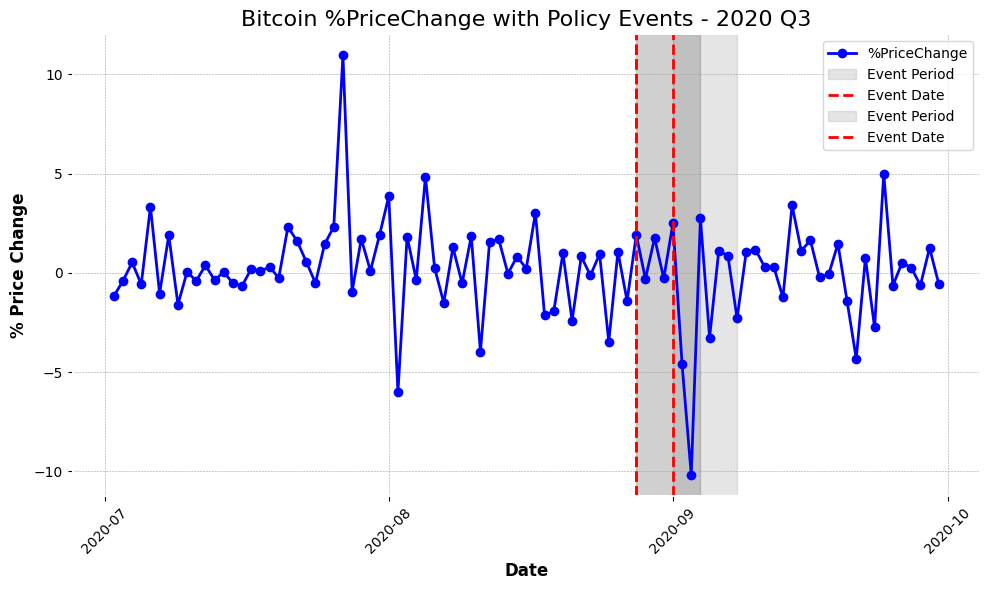

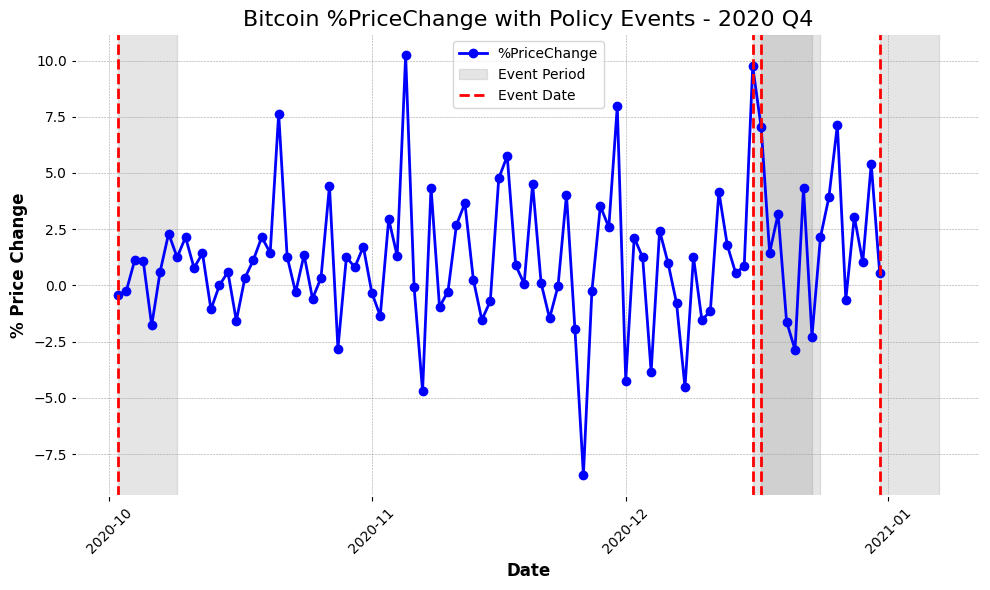

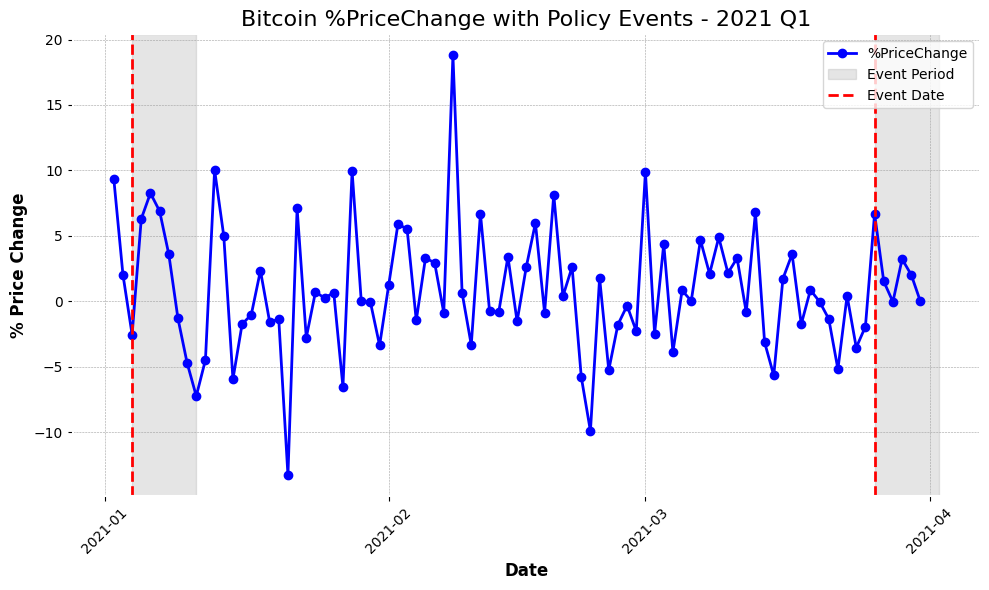

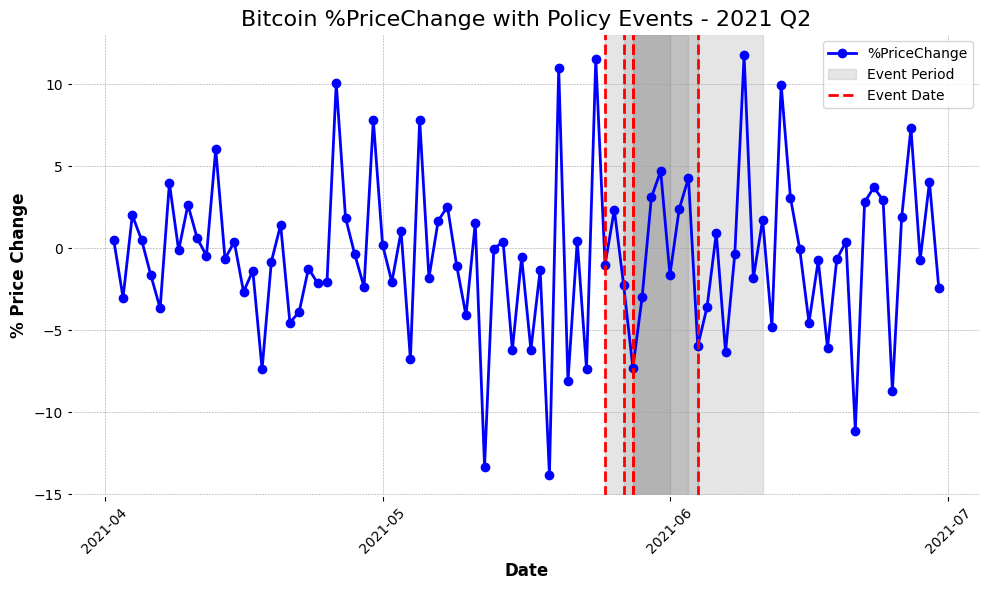

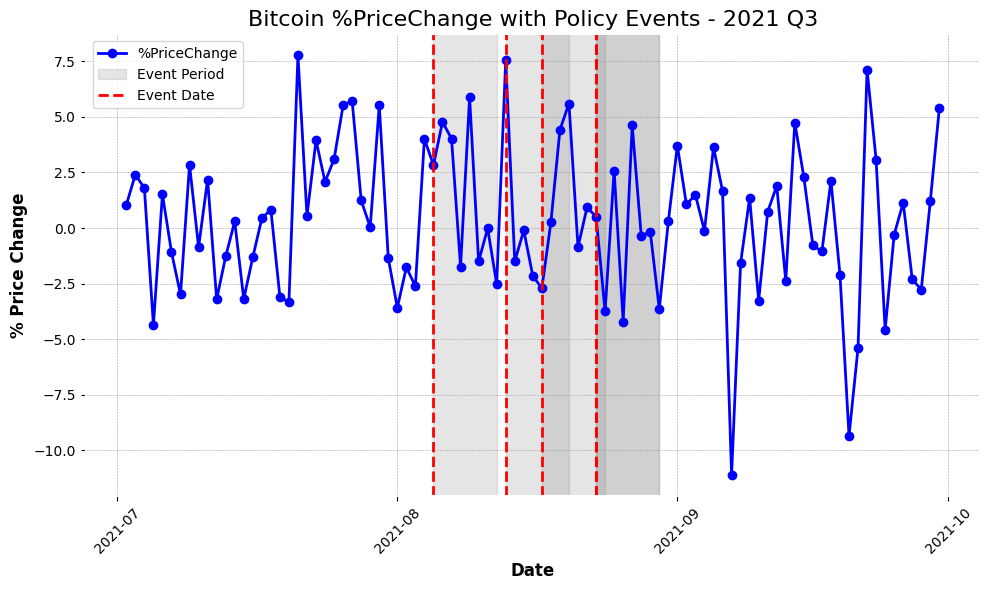

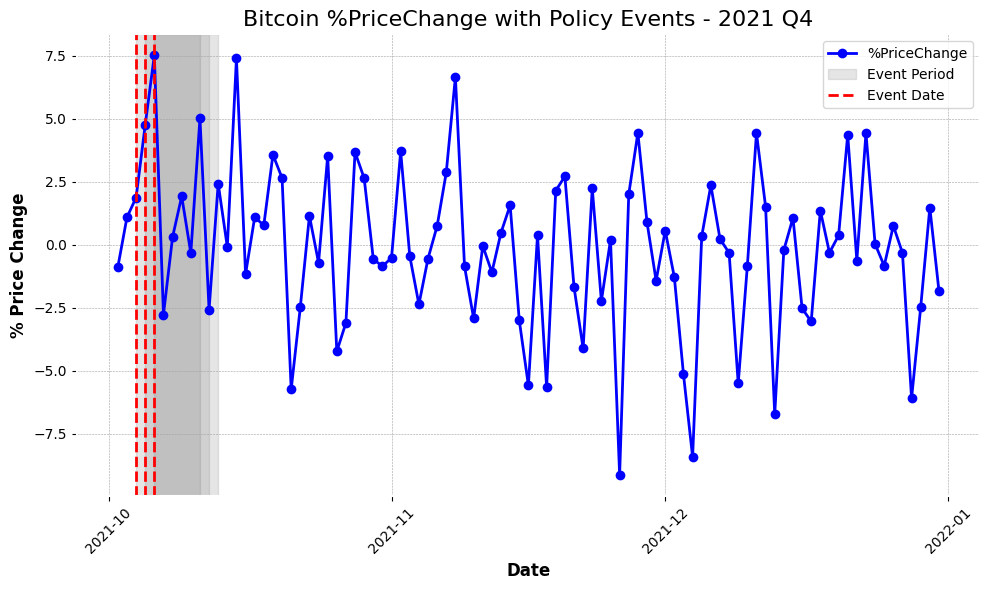

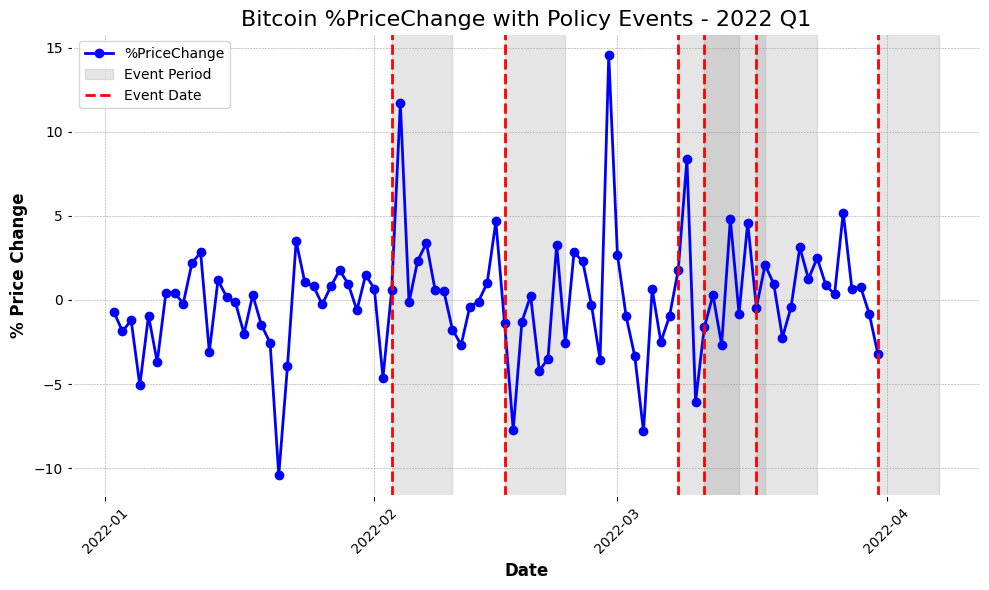

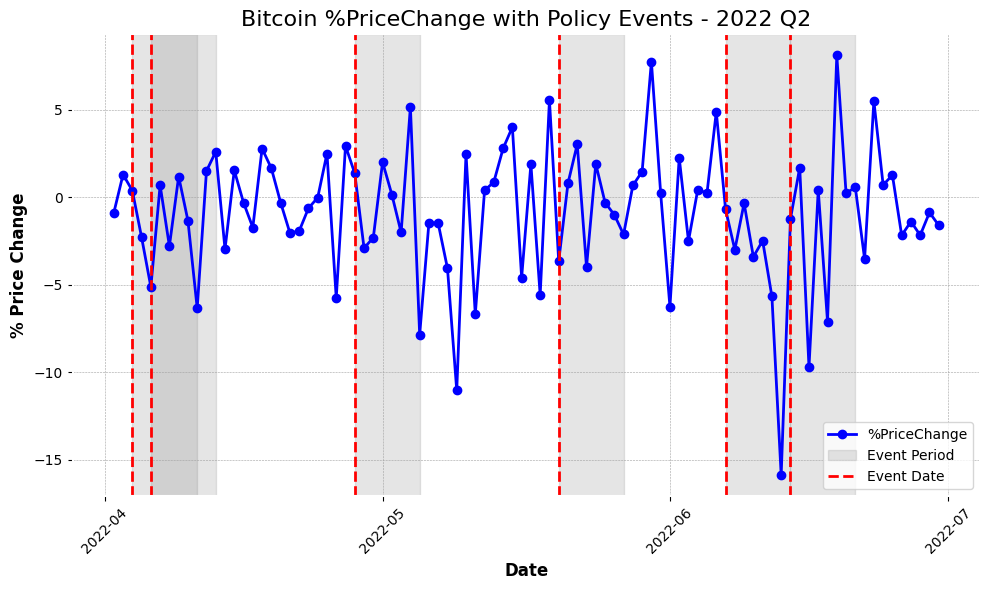

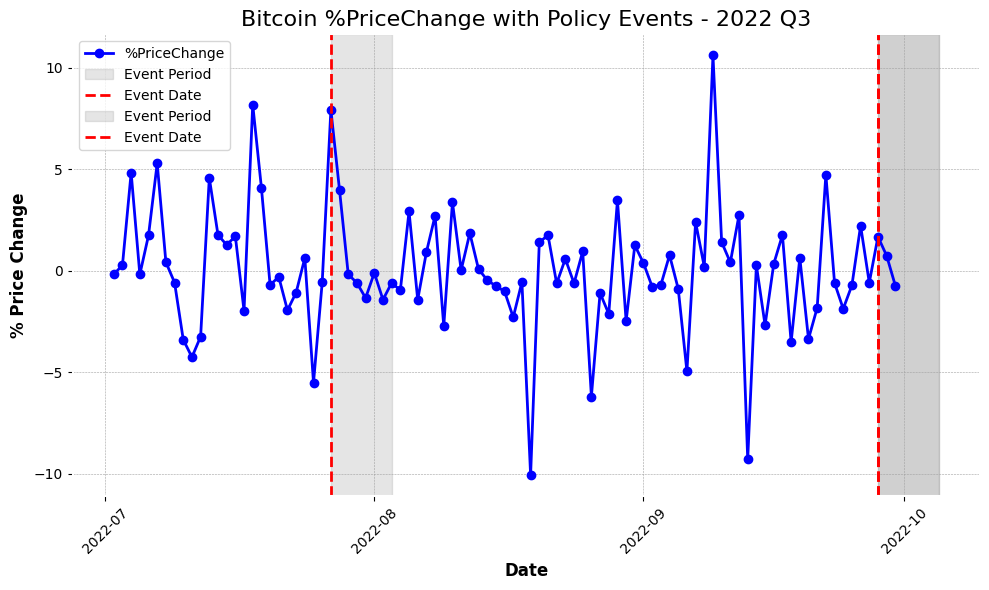

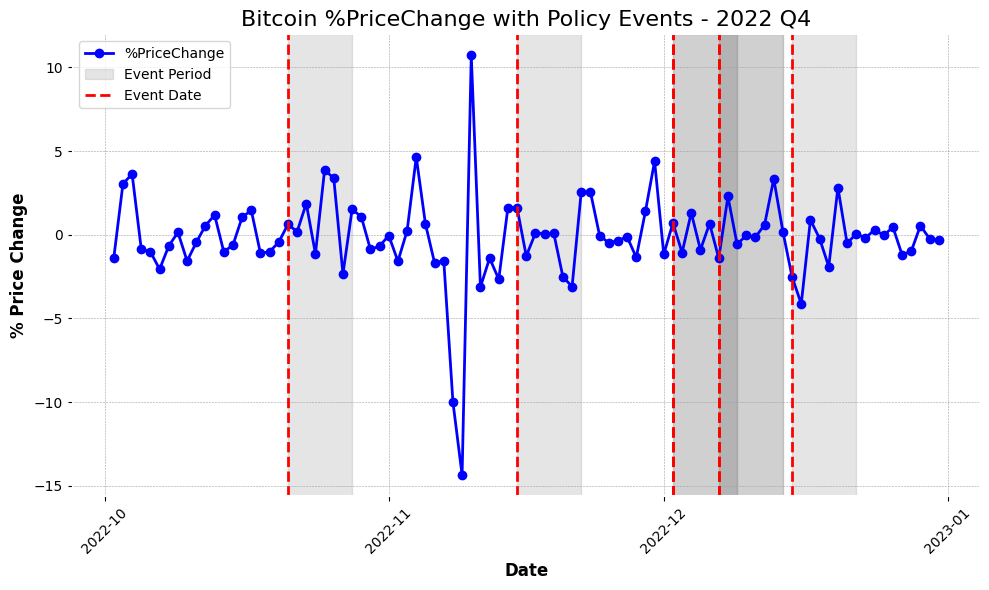

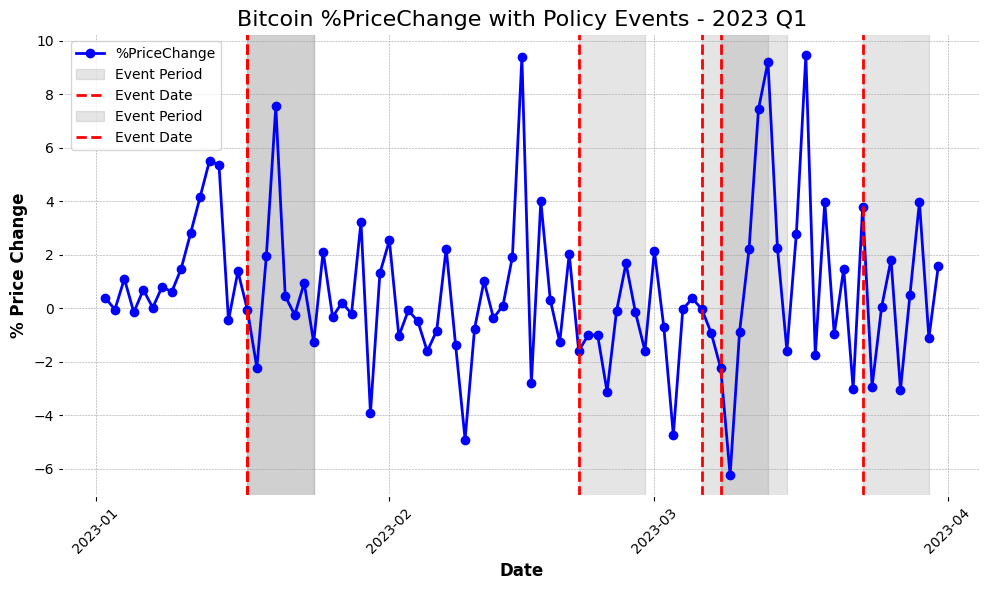

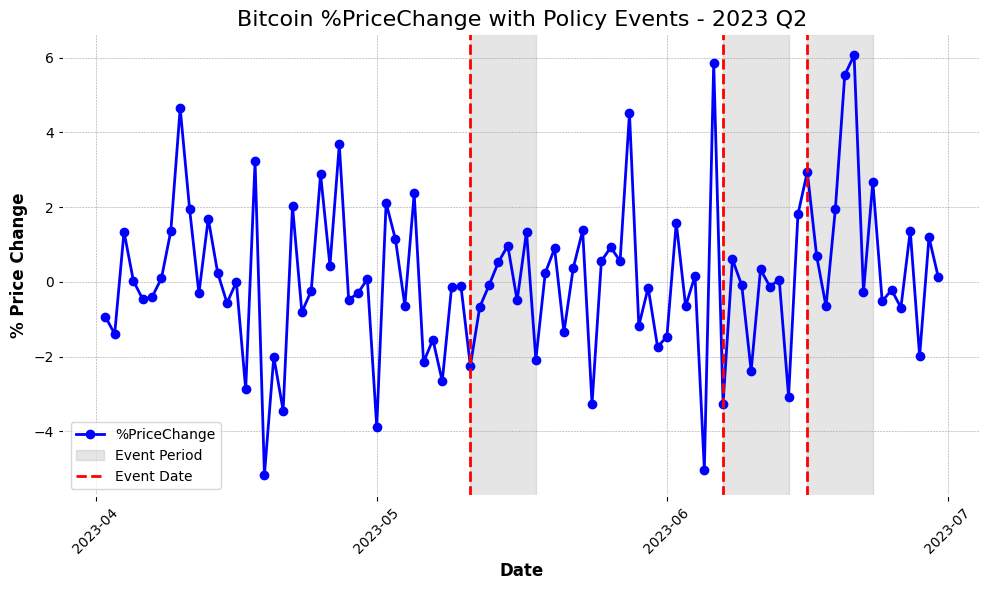

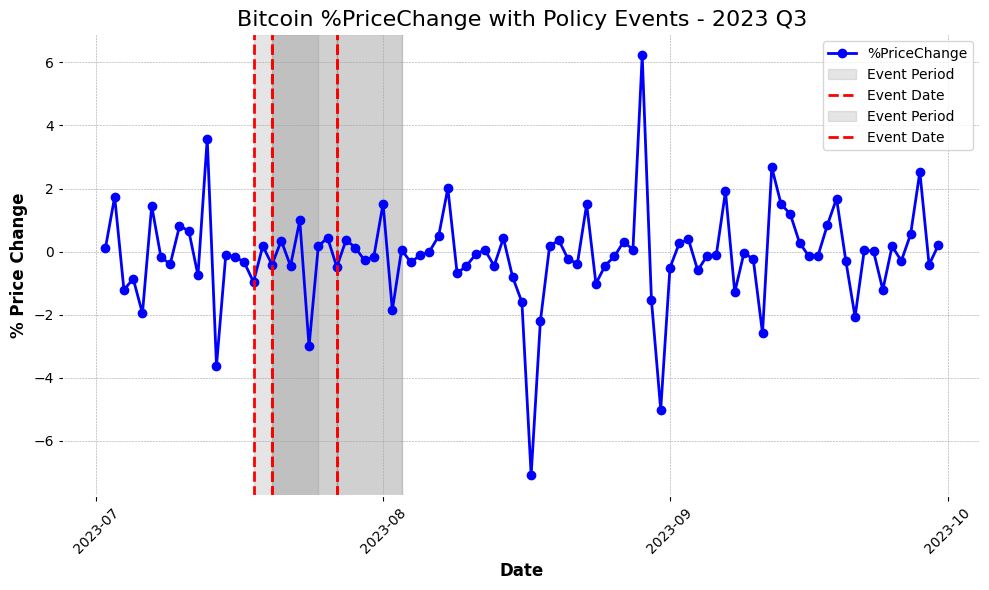

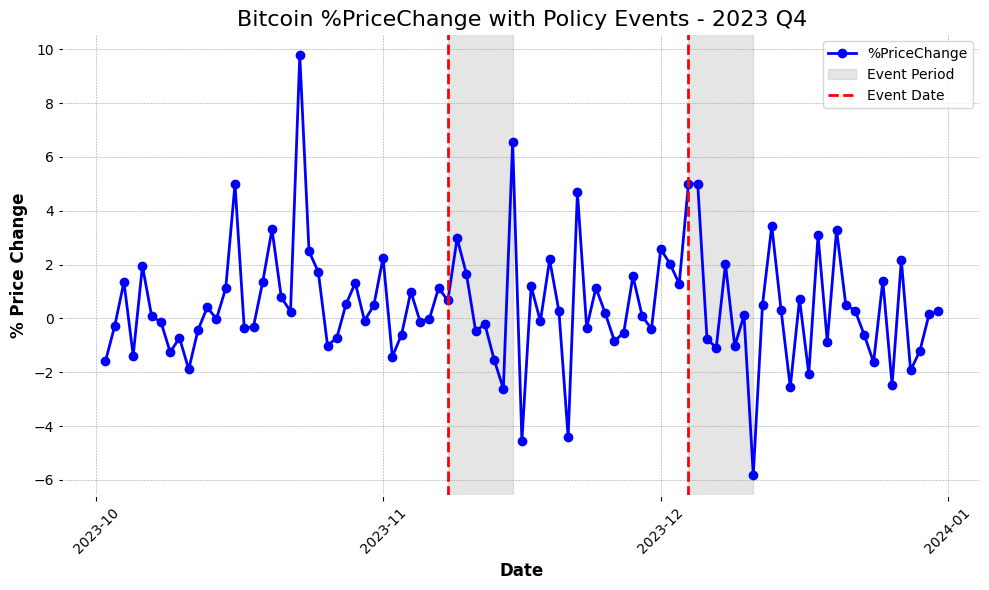

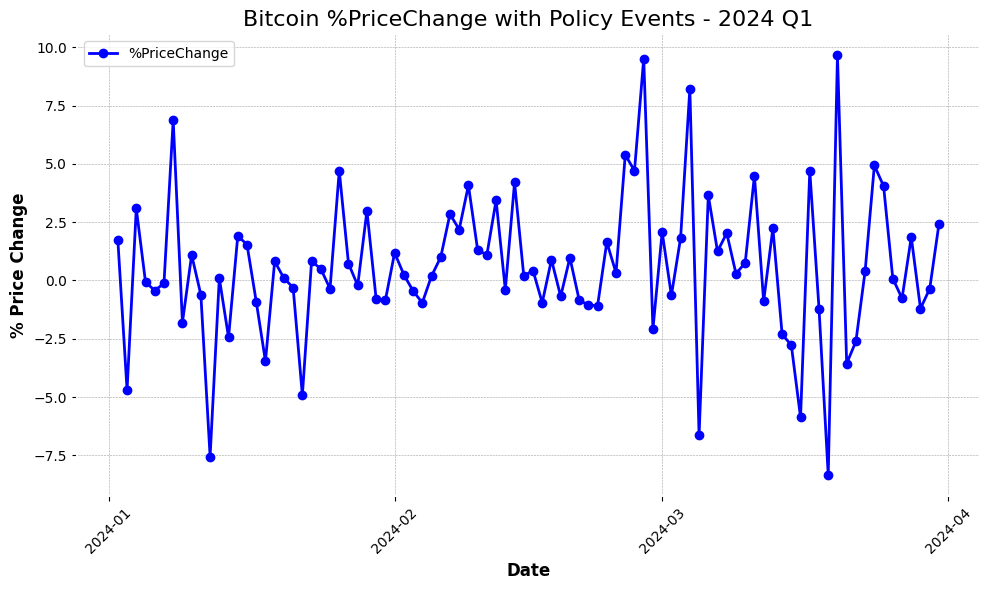

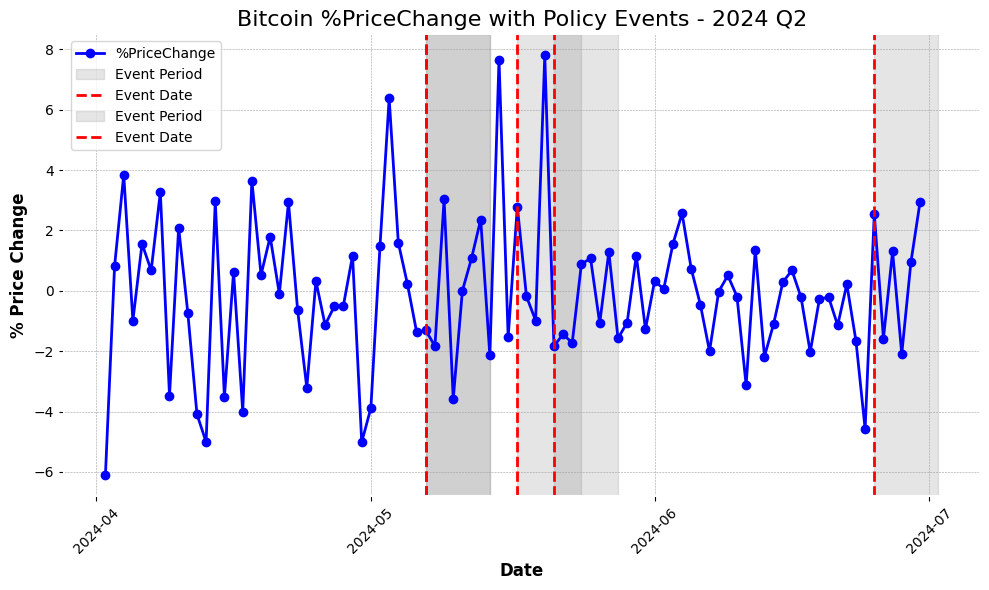

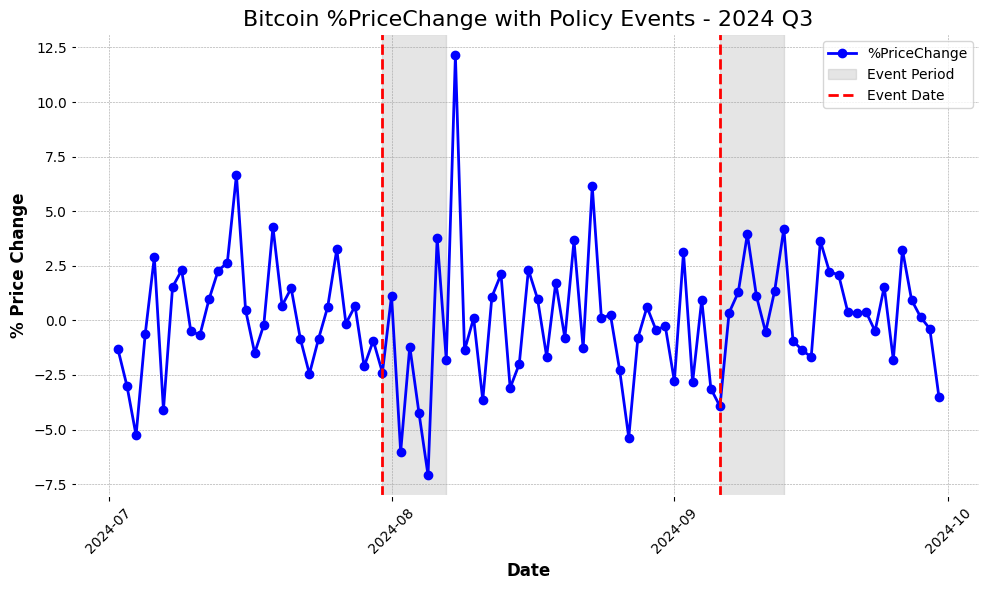

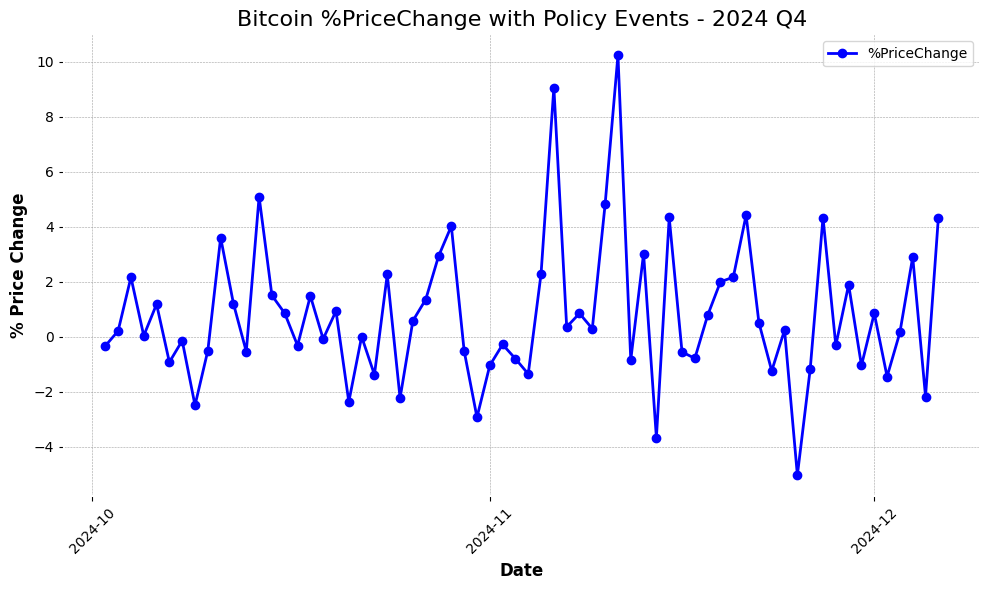

In [172]:
# Loop through each year from 2018 to 2024 and create a plot for each quarter
for year in range(2018, 2025):
    for quarter in range(1, 5):
        # Define the start and end date for the current quarter
        start_date = pd.to_datetime(f'{year}-{(quarter-1)*3+1:02d}-01')
        end_date = pd.to_datetime(f'{year}-{quarter*3:02d}-01') + pd.DateOffset(months=1) - pd.Timedelta(days=1)

        # Convert start_date and end_date to UTC
        start_date = start_date.tz_localize('US/Eastern').tz_convert('UTC')
        end_date = end_date.tz_localize('US/Eastern').tz_convert('UTC')

        # Filter Bitcoin data for the current quarter
        bitcoin_df_quarter = bitcoin_df[(bitcoin_df['Date'] >= start_date) & (bitcoin_df['Date'] <= end_date)]

        # Filter event dates for the current quarter
        event_dates_quarter = law_df[(law_df['Date of Introduction'] >= start_date) & 
                                      (law_df['Date of Introduction'] <= end_date)]['Date of Introduction'].tolist()

        # Create the plot for the current quarter
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot Bitcoin %PriceChange Trend for the current quarter
        ax.plot(bitcoin_df_quarter['Date'], bitcoin_df_quarter['%PriceChange'], label='%PriceChange', color='b', linestyle='-', marker='o')

        # Mark "DuringEvent" with shaded regions and event dates with vertical lines
        for event_date in event_dates_quarter:
            # Mark the 7-day event window
            event_start_window = event_date
            event_end_window = event_date + pd.Timedelta(days=7)

            # Ensure the event windows are in UTC
            event_start_window = event_start_window.tz_convert('UTC')
            event_end_window = event_end_window.tz_convert('UTC')

            # Shaded region for event period
            ax.axvspan(event_start_window, event_end_window, color='gray', alpha=0.2, label='Event Period' if event_date == event_dates_quarter[0] else "")

            # Vertical line for each Date of Introduction
            ax.axvline(event_date, color='r', linestyle='--', label='Event Date' if event_date == event_dates_quarter[0] else "")

        # Label the chart
        ax.set_title(f'Bitcoin %PriceChange with Policy Events - {year} Q{quarter}', fontsize=16)
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel('% Price Change', fontsize=12)
        ax.legend()

        # Rotate x-axis labels for readability
        plt.xticks(rotation=45)
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Tight layout for better spacing
        plt.tight_layout()

        plt.show()  # Display the plot
        plt.close()  # Close the figure after displaying

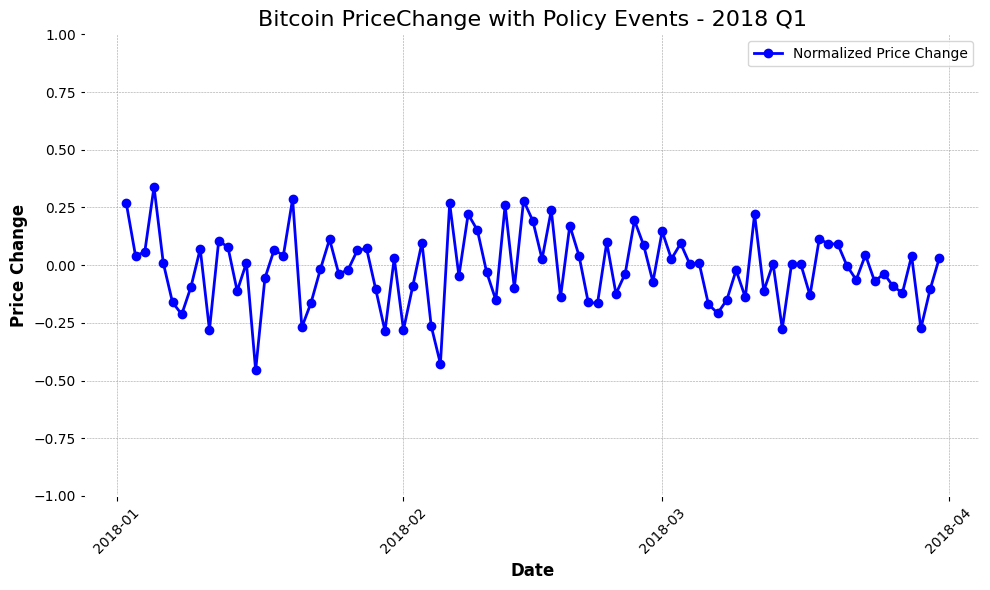

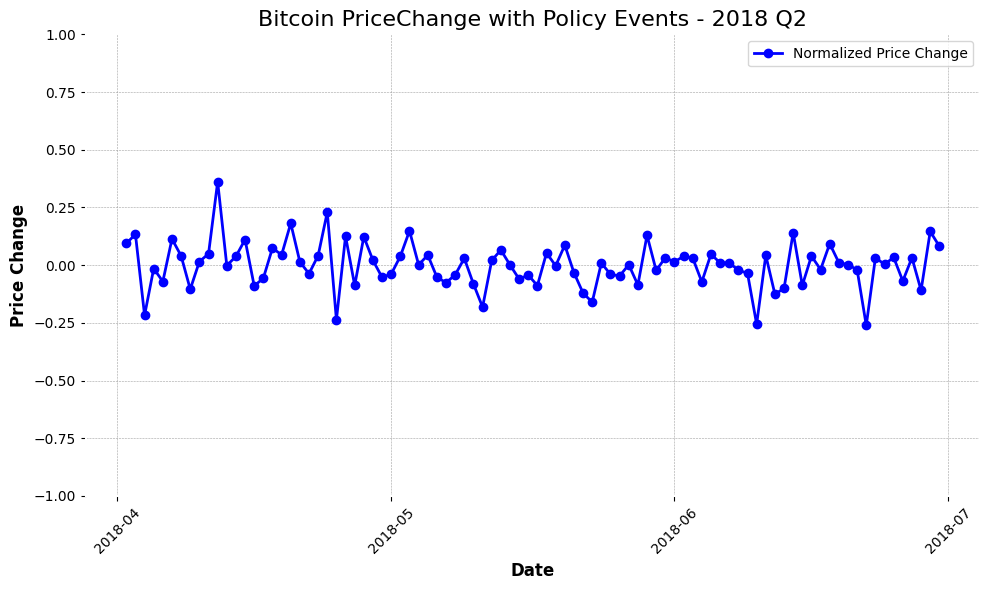

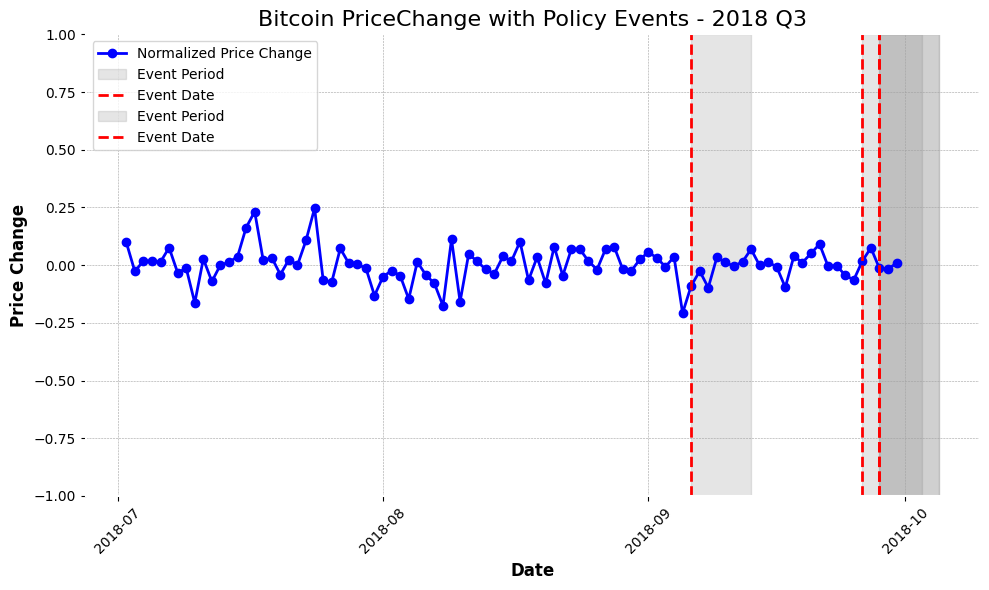

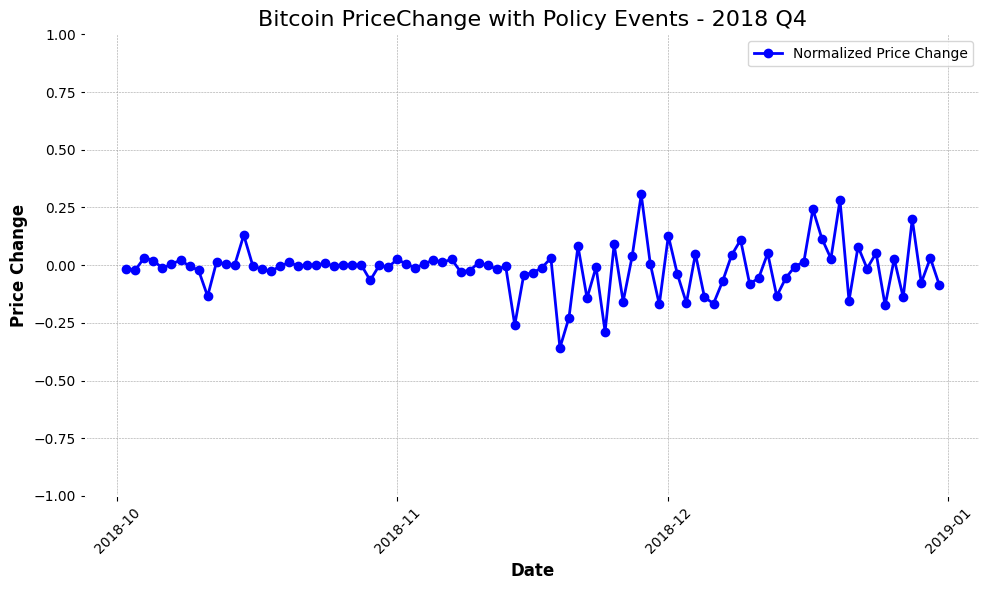

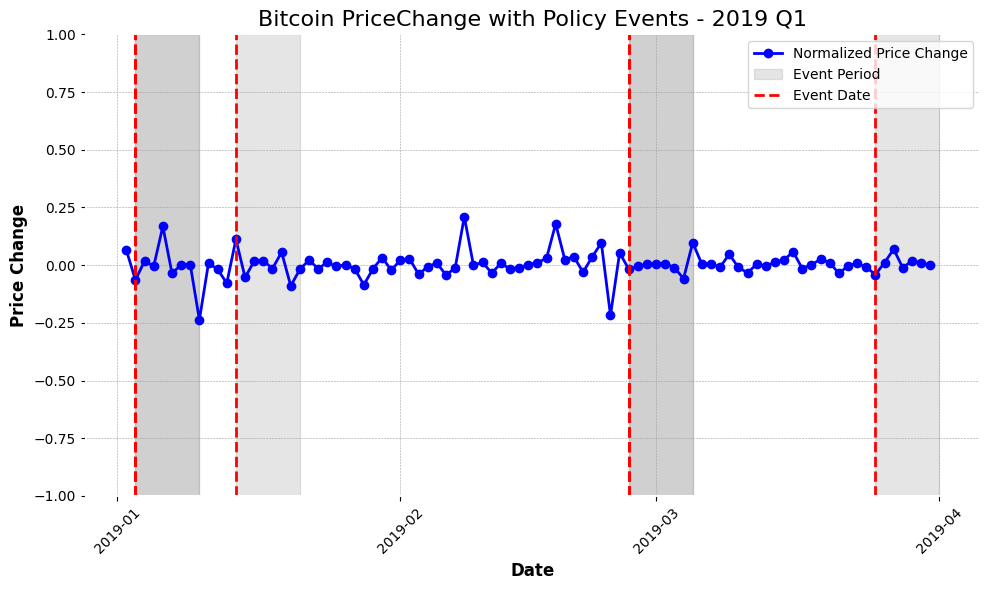

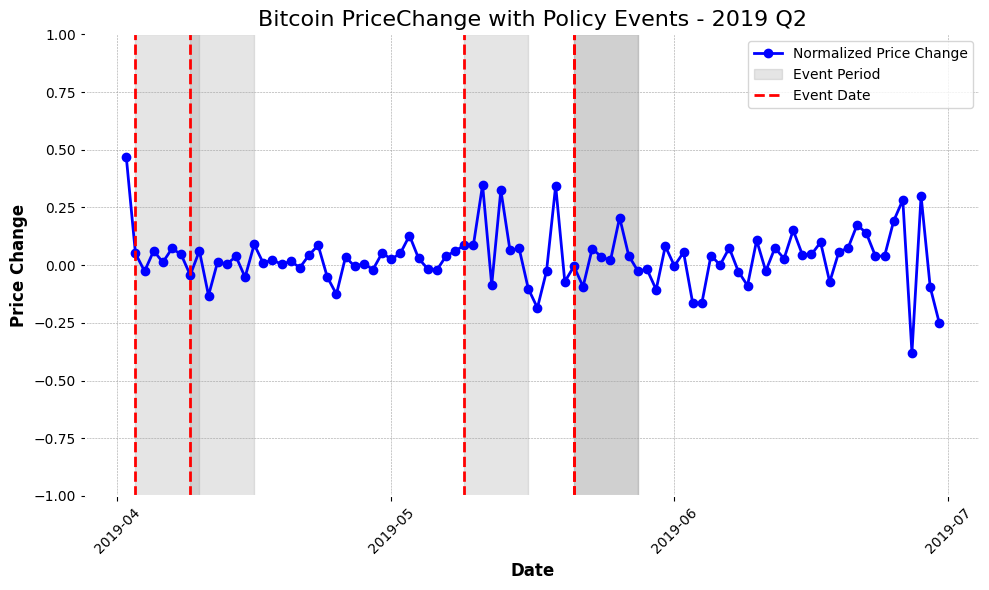

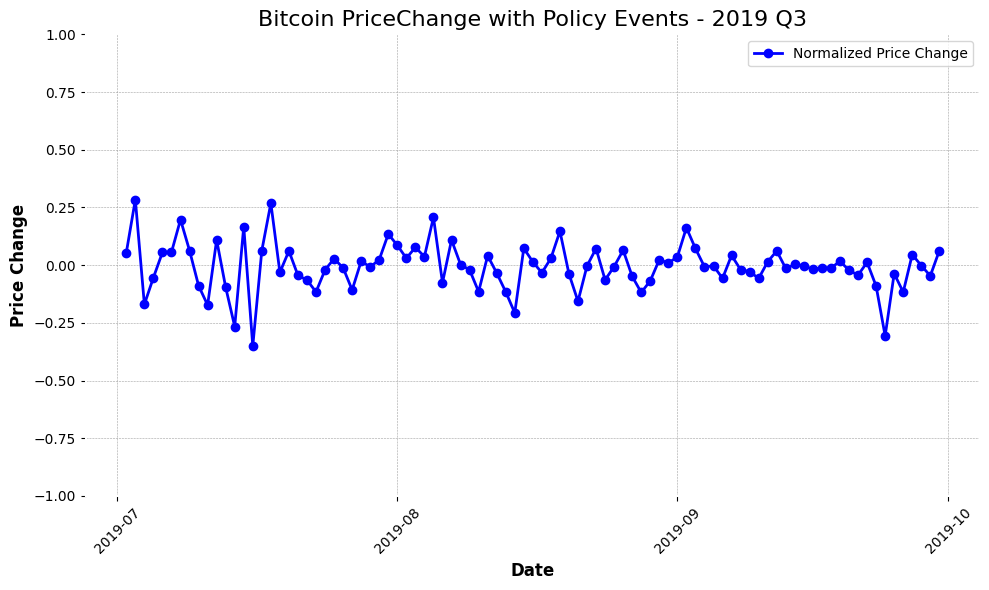

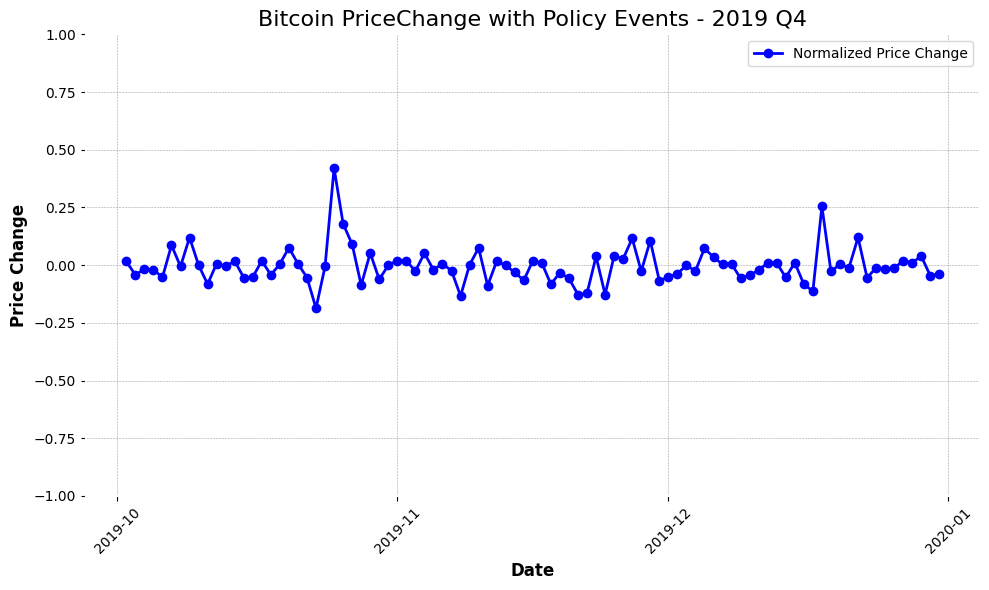

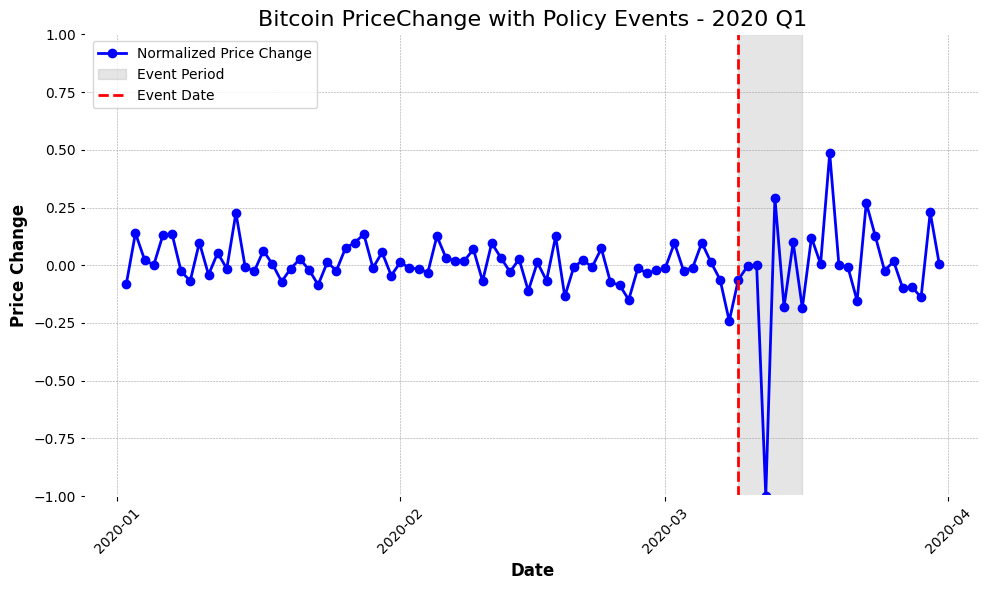

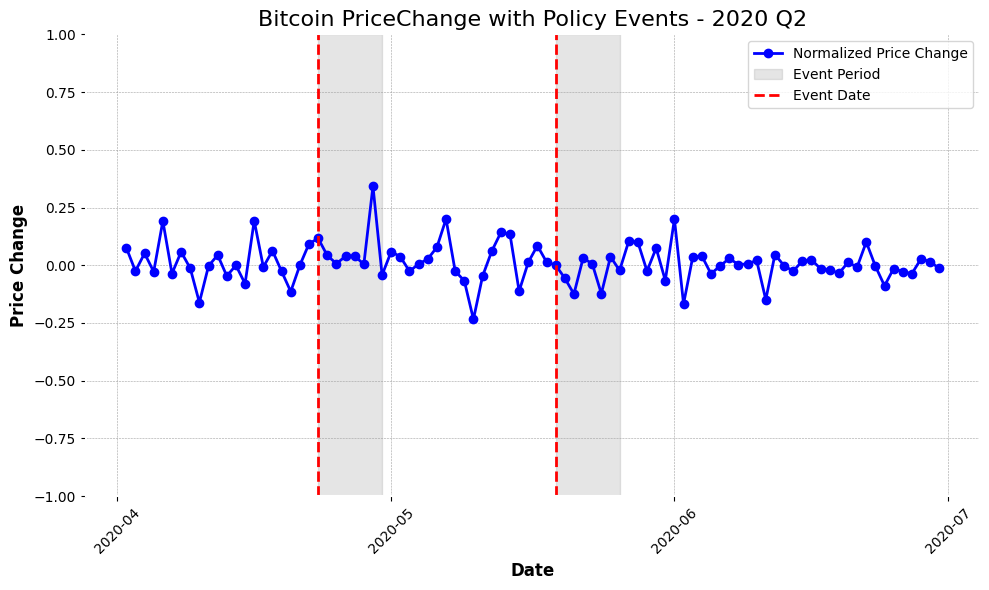

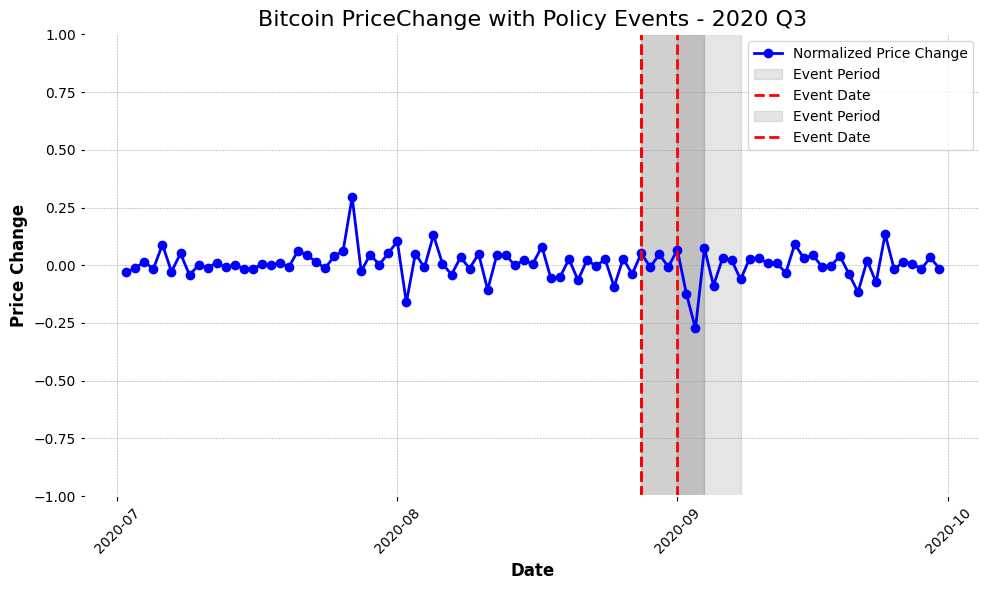

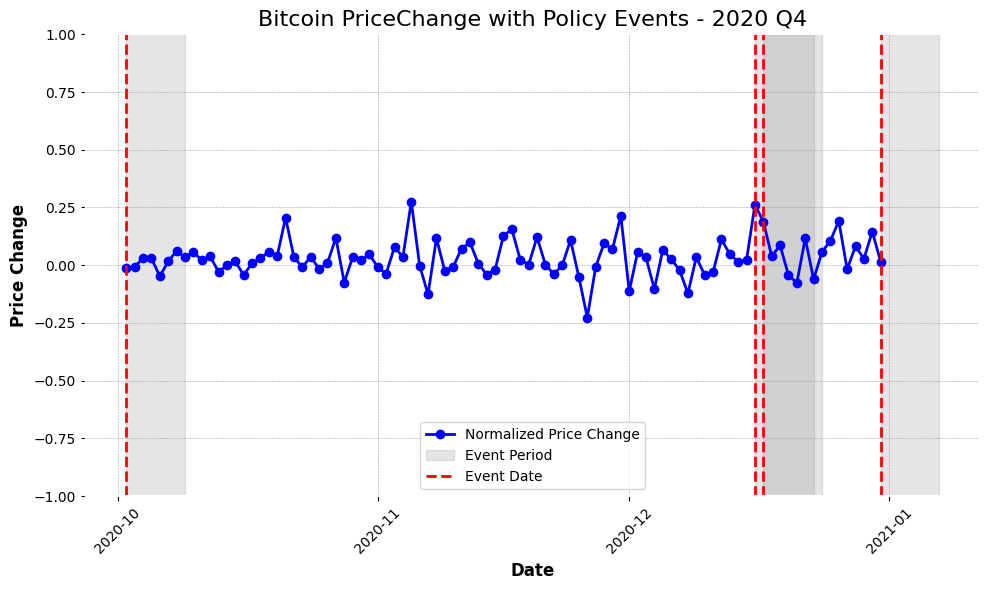

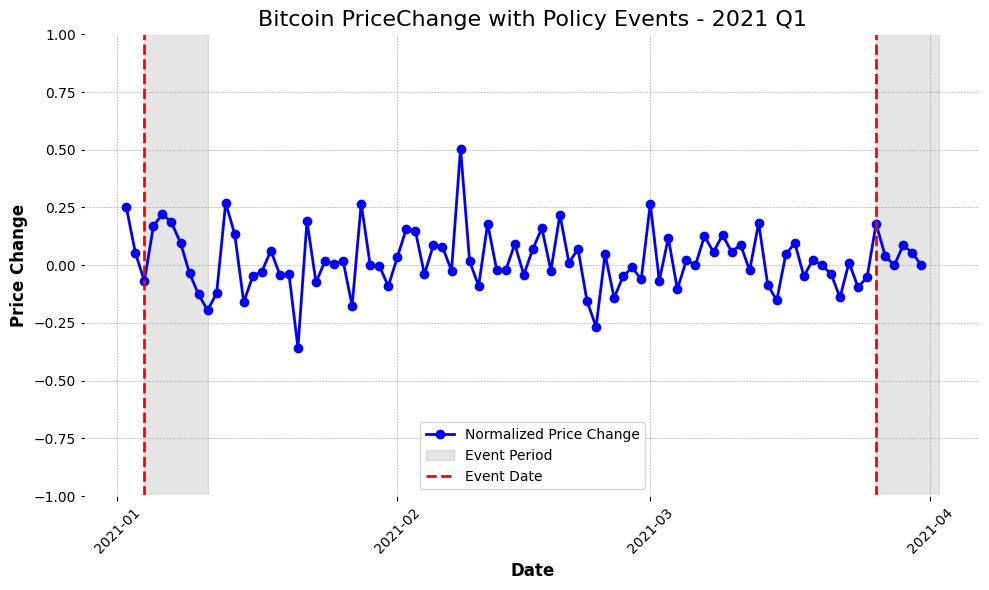

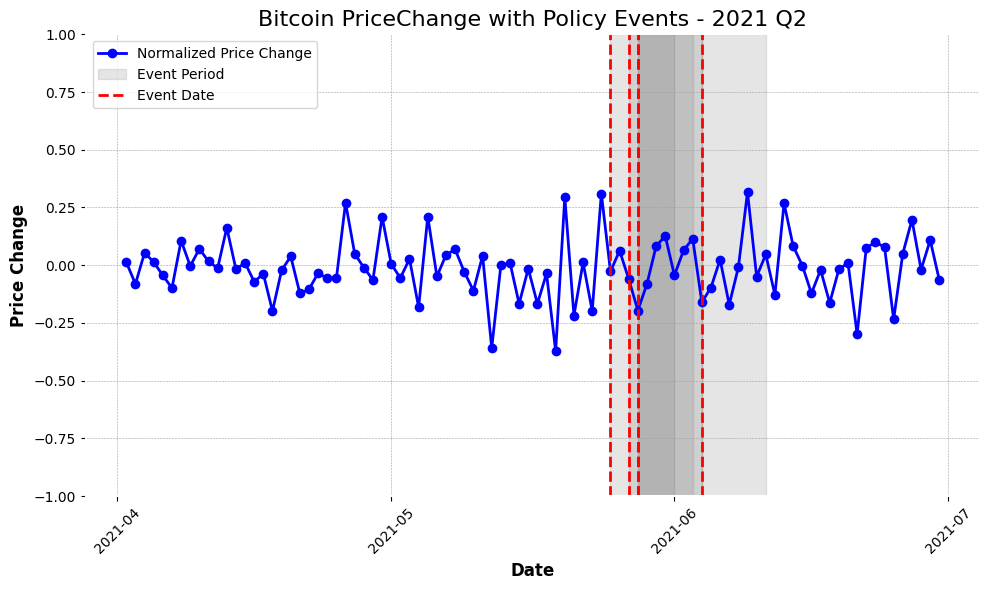

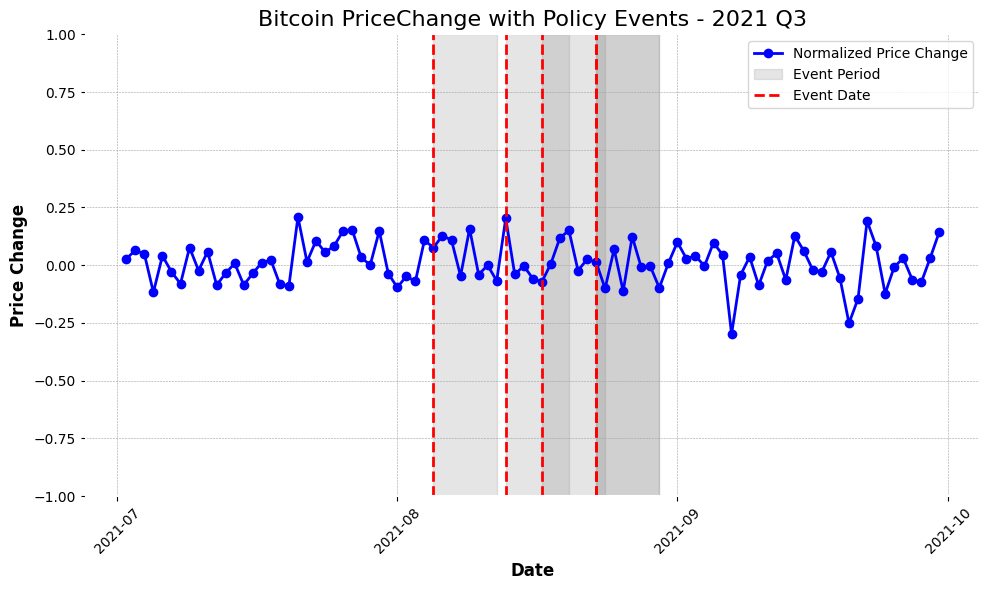

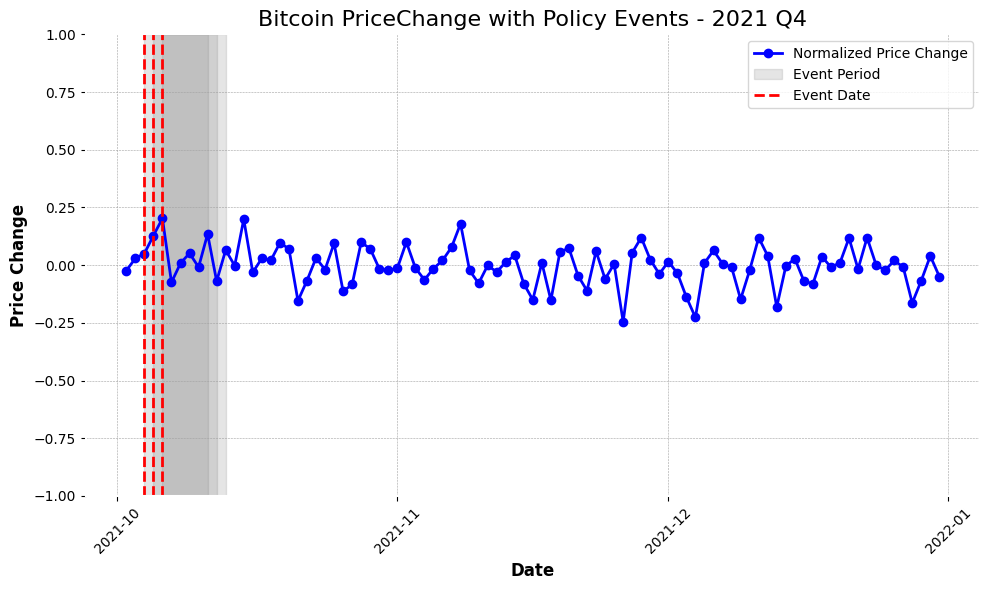

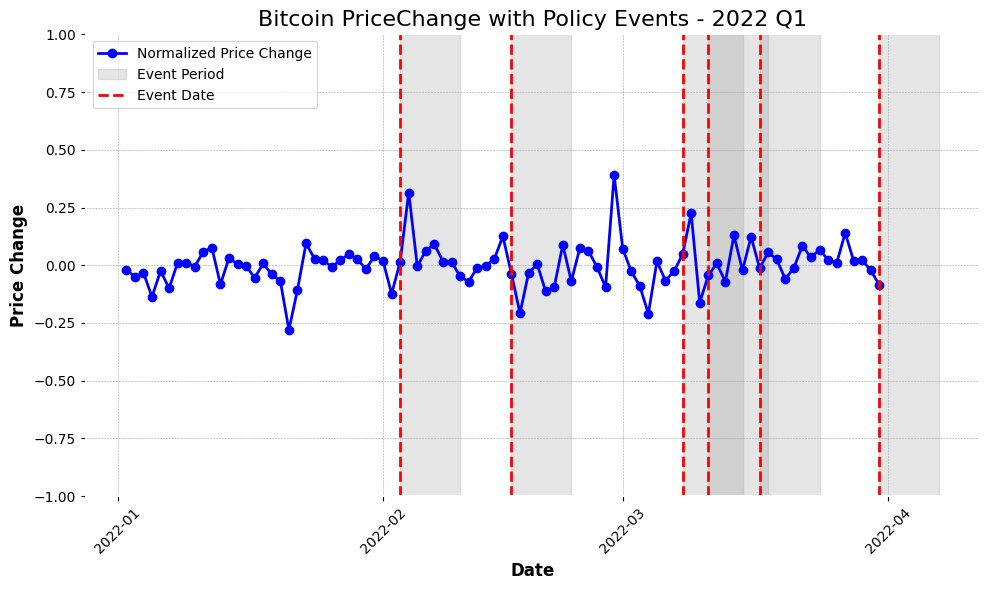

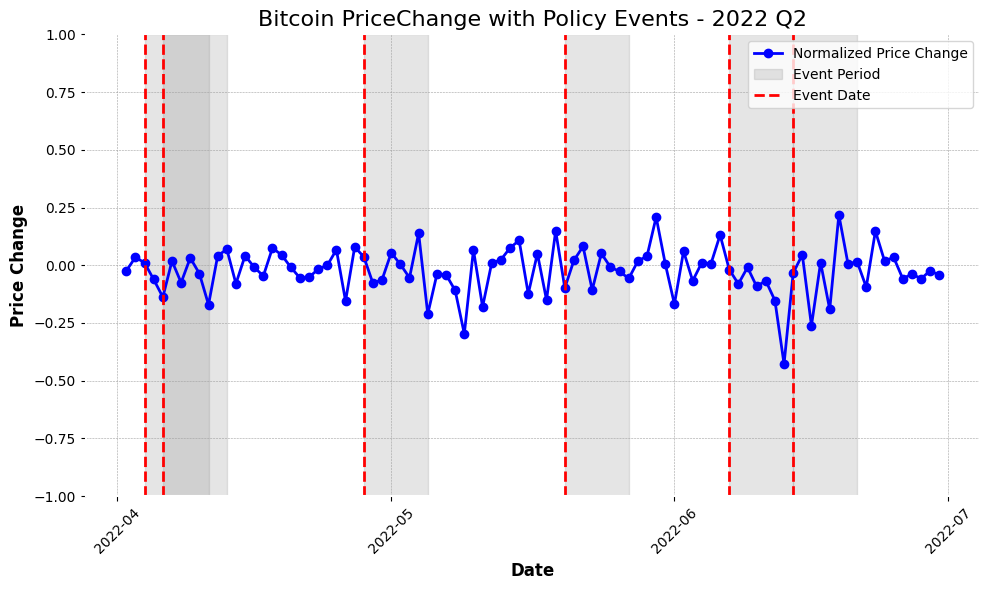

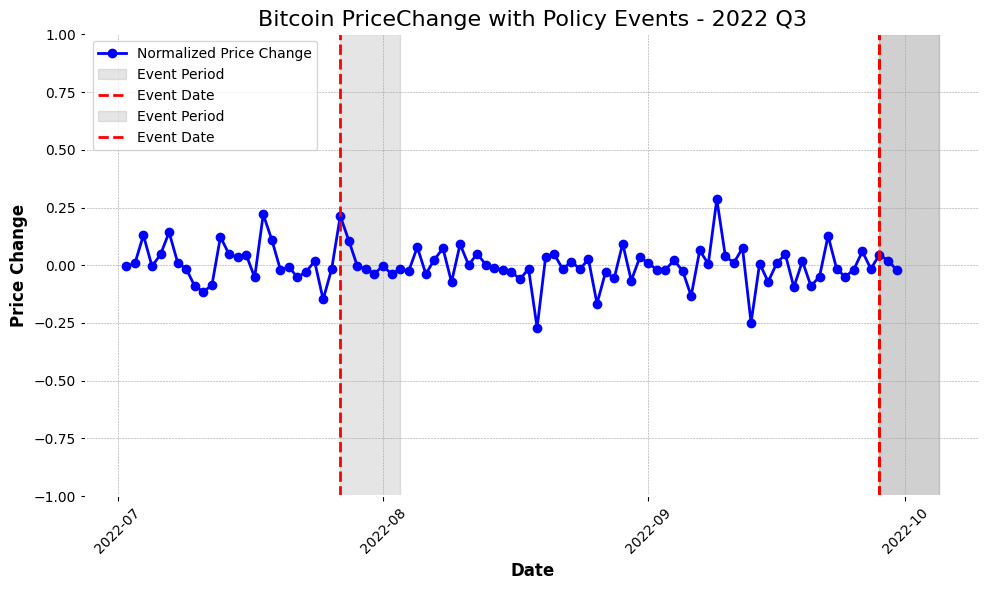

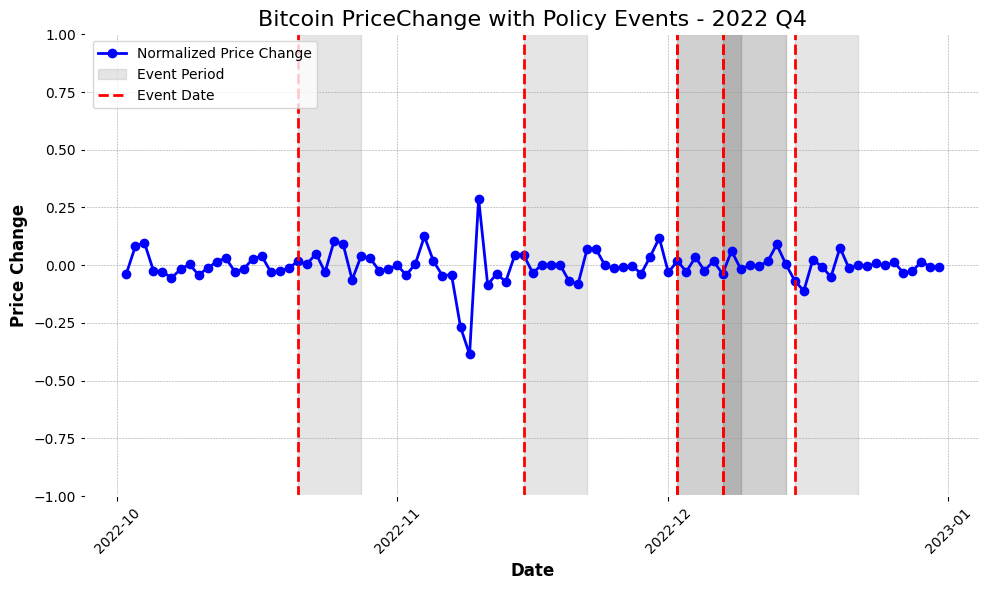

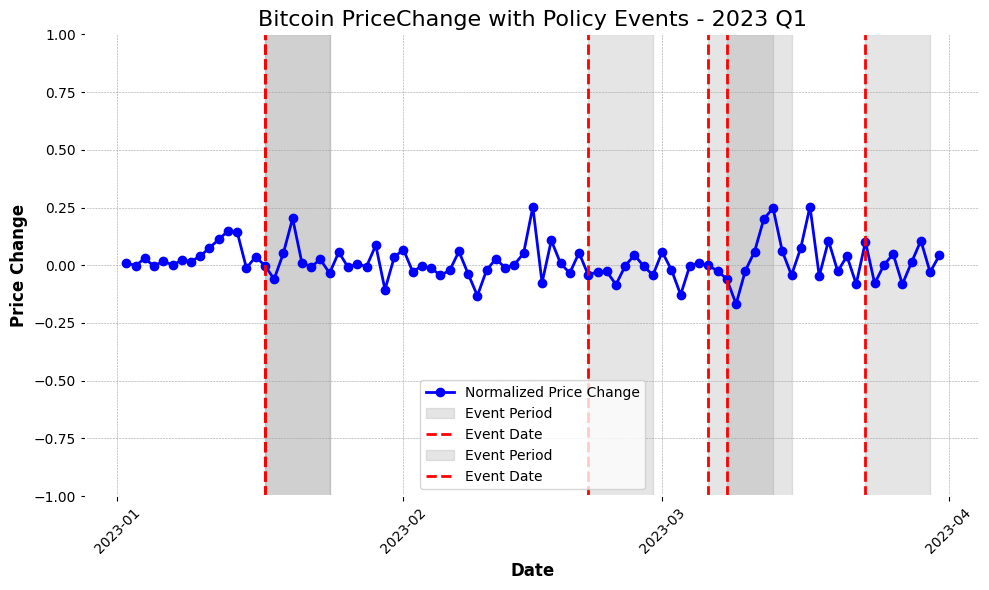

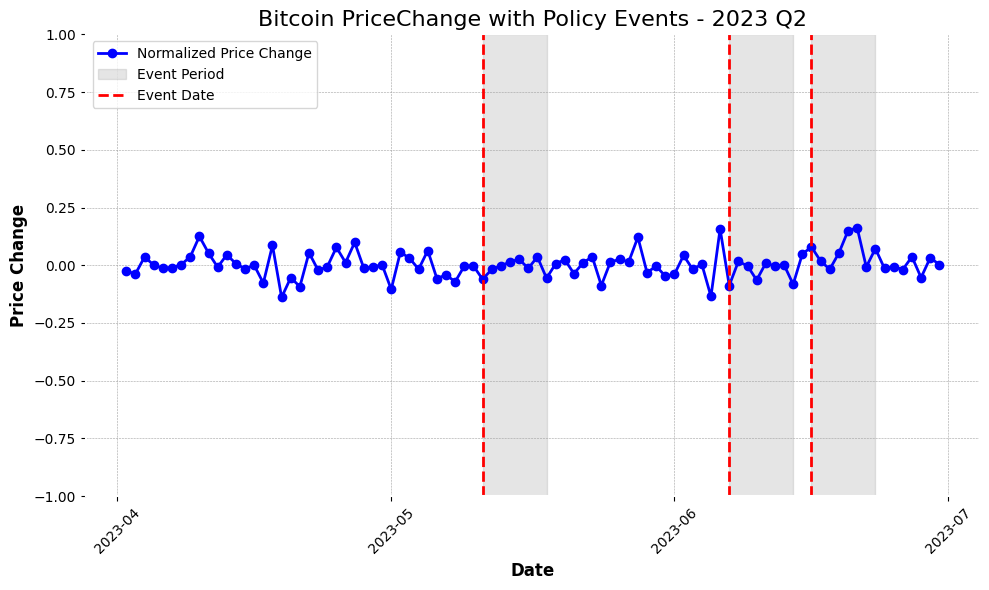

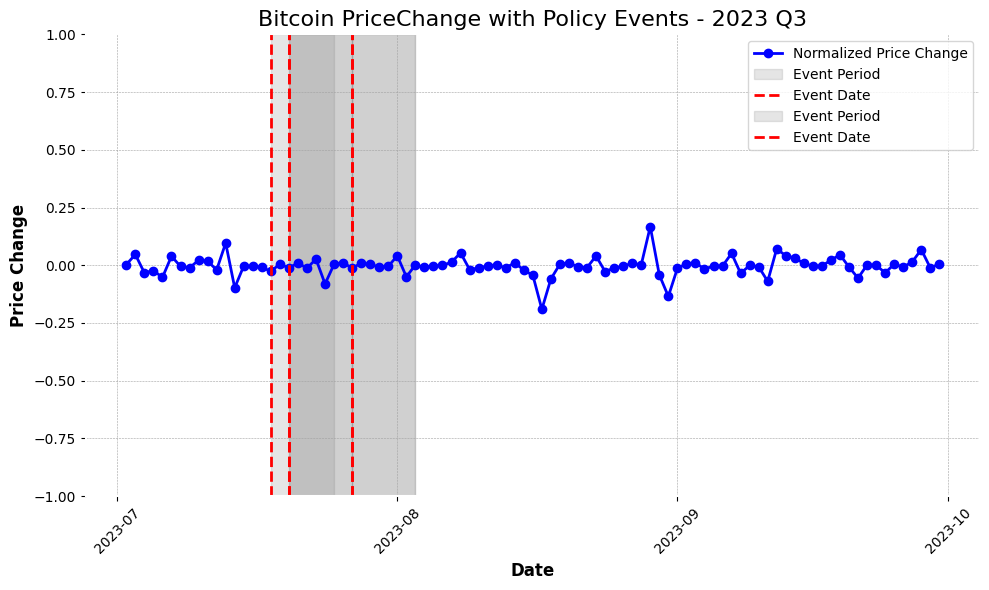

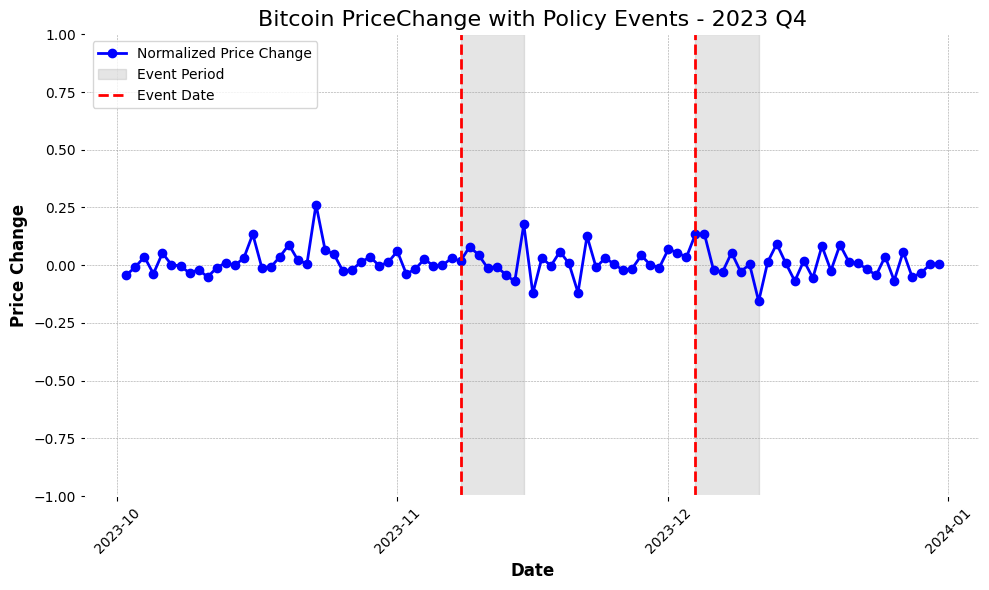

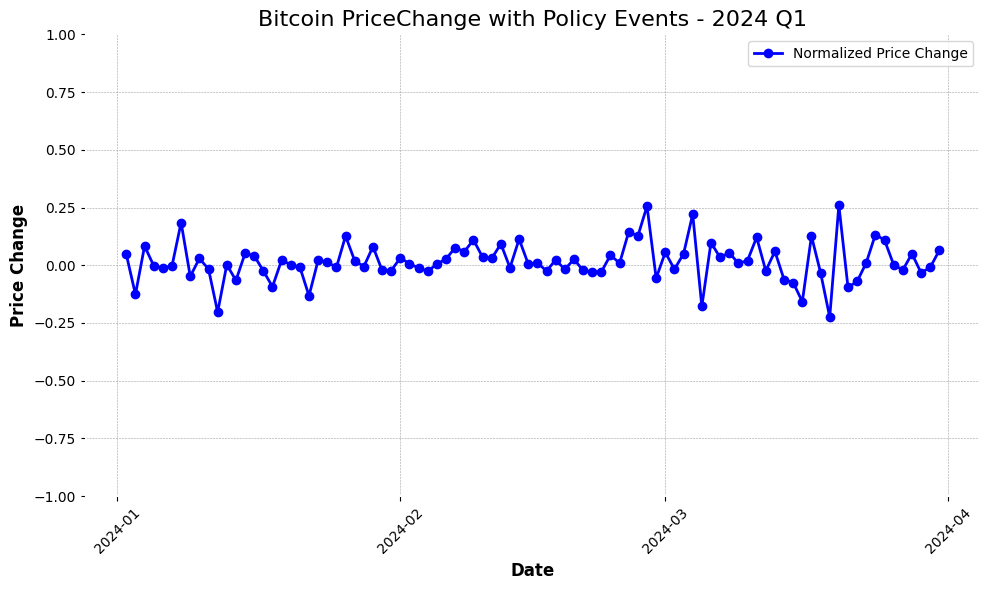

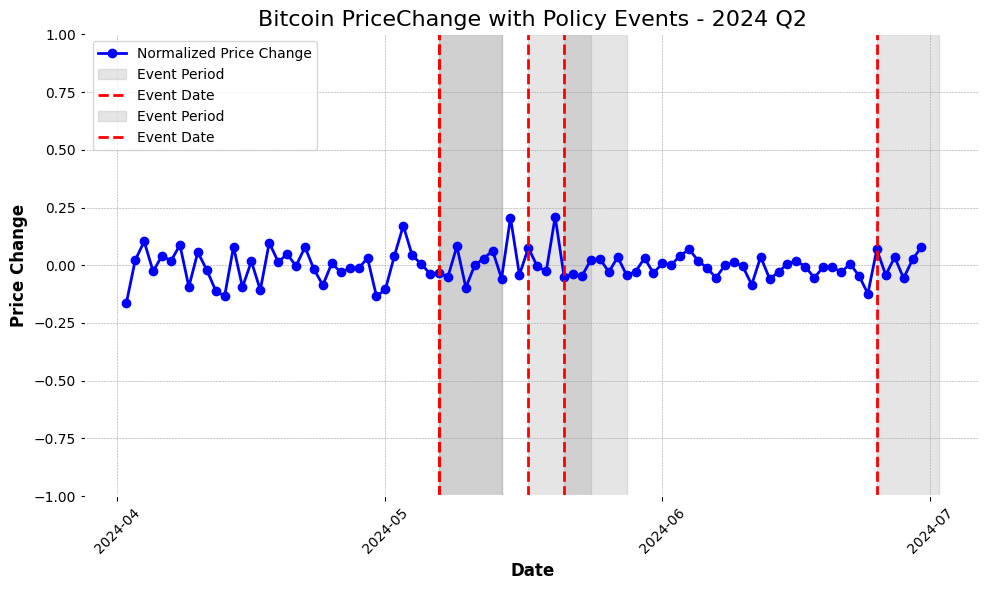

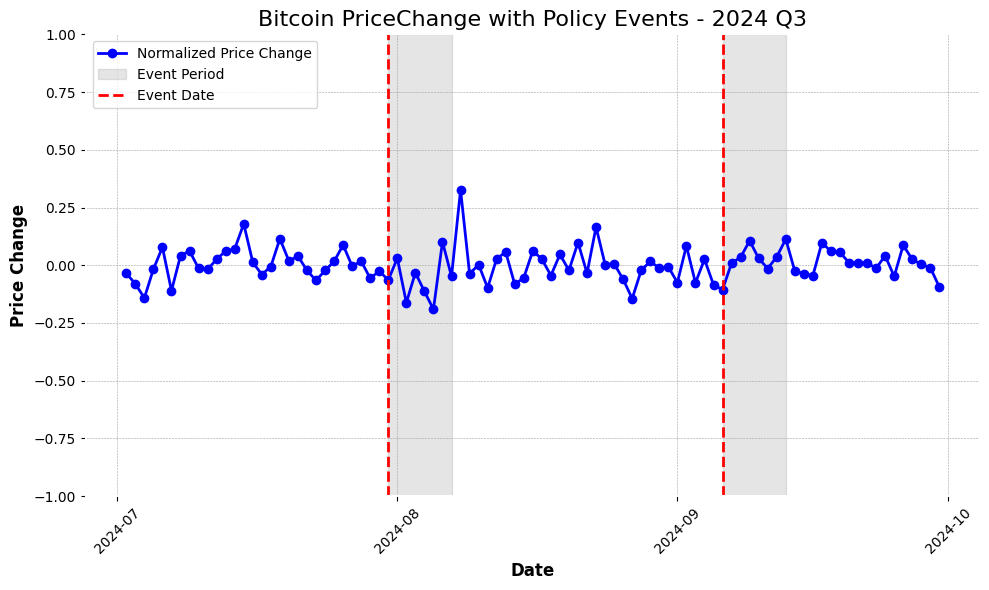

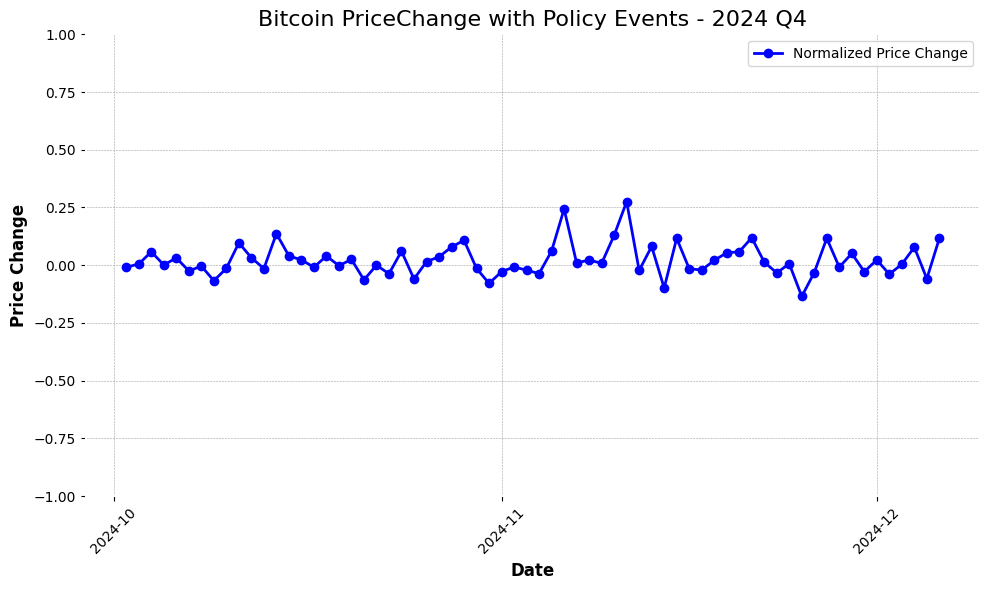

In [173]:
# Loop through each year from 2018 to 2024 and create a plot for each quarter
for year in range(2018, 2025):
    for quarter in range(1, 5):
        # Define the start and end date for the current quarter
        start_date = pd.to_datetime(f'{year}-{(quarter-1)*3+1:02d}-01')
        end_date = pd.to_datetime(f'{year}-{quarter*3:02d}-01') + pd.DateOffset(months=1) - pd.Timedelta(days=1)

        # Convert start_date and end_date to UTC
        start_date = start_date.tz_localize('US/Eastern').tz_convert('UTC')
        end_date = end_date.tz_localize('US/Eastern').tz_convert('UTC')

        # Filter Bitcoin data for the current quarter
        bitcoin_df_quarter = bitcoin_df[(bitcoin_df['Date'] >= start_date) & (bitcoin_df['Date'] <= end_date)]

        # Filter event dates for the current quarter
        event_dates_quarter = law_df[(law_df['Date of Introduction'] >= start_date) & 
                                      (law_df['Date of Introduction'] <= end_date)]['Date of Introduction'].tolist()

        # Create the plot for the current quarter
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot Bitcoin %PriceChange Trend for the current quarter
        ax.plot(bitcoin_df_quarter['Date'], bitcoin_df_quarter['normalizedPriceChange'], label='Normalized Price Change', color='b', linestyle='-', marker='o')

        # Mark "DuringEvent" with shaded regions and event dates with vertical lines
        for event_date in event_dates_quarter:
            # Mark the 7-day event window
            event_start_window = event_date
            event_end_window = event_date + pd.Timedelta(days=7)

            # Ensure the event windows are in UTC
            event_start_window = event_start_window.tz_convert('UTC')
            event_end_window = event_end_window.tz_convert('UTC')

            # Shaded region for event period
            ax.axvspan(event_start_window, event_end_window, color='gray', alpha=0.2, label='Event Period' if event_date == event_dates_quarter[0] else "")

            # Vertical line for each Date of Introduction
            ax.axvline(event_date, color='r', linestyle='--', label='Event Date' if event_date == event_dates_quarter[0] else "")

        # Label the chart
        ax.set_title(f'Bitcoin PriceChange with Policy Events - {year} Q{quarter}', fontsize=16)
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel('Price Change', fontsize=12)
        ax.legend()

        # Set y-axis limits from -1 to 1
        ax.set_ylim(-1, 1)

        # Rotate x-axis labels for readability
        plt.xticks(rotation=45)
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Tight layout for better spacing
        plt.tight_layout()

        plt.show()  # Display the plot
        plt.close()  # Close the figure after displaying
